In [795]:
import pickle
import requests
from bs4 import BeautifulSoup
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import diagnostic_plots

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

with open('first_group_top40.pkl', 'rb') as picklefile:
    df = pickle.load(picklefile)
    
with open('padres_top40.pkl', 'rb') as picklefile:
    padres_df = pickle.load(picklefile)

In [796]:
df = pd.concat([df, padres_df])

In [797]:
float_cols = ['BA', 'OBP', 'SLG', 'OPS', 'dWAR']
integer_cols = ['Year', 'Age', 'Games_Played', 'Plate_Appearances', 'At_Bats',
                'Runs', 'Hits', '2B', '3B', 'HR', 'RBI', 'SB', 'BB', 'SO', 'TB', 'HBP', 'SF']
for i in integer_cols:
    df[i] = df[i].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1717 entries, 0 to 151
Data columns (total 33 columns):
Player_Name          1717 non-null object
Year                 1717 non-null int64
Age                  1717 non-null int64
Team                 1717 non-null object
League               1717 non-null object
Games_Played         1717 non-null int64
Plate_Appearances    1717 non-null int64
At_Bats              1717 non-null int64
Runs                 1717 non-null int64
Hits                 1717 non-null int64
2B                   1717 non-null int64
3B                   1717 non-null int64
HR                   1717 non-null int64
RBI                  1717 non-null int64
SB                   1717 non-null int64
CS                   1717 non-null object
BB                   1717 non-null int64
SO                   1717 non-null int64
BA                   1717 non-null object
OBP                  1717 non-null object
SLG                  1717 non-null object
OPS                  1717 

In [798]:
df_2018 = df[df['Year'] == 2018]
df_2018_team = df_2018[['Player_Name', 'Team']]
df_2018_pos = df_2018[['Player_Name', 'Pos']]

In [799]:
df_2018_pos

,Player_Name,Pos
1,Scott Alexander,1
11,Rich Hill,1
19,Daniel Hudson,1
28,Kenley Jansen,1
34,Alex Wood,1
45,Clayton Kershaw,1
48,Kenta Maeda,1
51,Ross Stripling,1
53,Pat Venditte,/1
58,Erik Goeddel,1


In [800]:
df_2018_pos['Pos'] = df_2018_pos['Pos'].str.replace('*', '')
df_2018_pos['Pos'] = df_2018_pos['Pos'].str.replace('/', '')
df_2018_pos['Pos'] = df_2018_pos['Pos'].str[0]

/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [801]:
df_2018_pos

,Player_Name,Pos
1,Scott Alexander,1
11,Rich Hill,1
19,Daniel Hudson,1
28,Kenley Jansen,1
34,Alex Wood,1
45,Clayton Kershaw,1
48,Kenta Maeda,1
51,Ross Stripling,1
53,Pat Venditte,1
58,Erik Goeddel,1


In [802]:
df_2018_team['Team'].unique()

array(['LAD', 'TOT', 'TBR', 'STL', 'SDP', 'SFG', 'COL', 'LAA', 'WSN',
       'PIT', 'TOR'], dtype=object)

In [803]:
df = df[df['Year'] > 2010]
df = df[df['Year'] < 2018]

In [804]:
df.loc[:, 'BA'] = df.loc[:, 'Hits'] / df.loc[:, 'At_Bats']
df.loc[:, 'OBP'] = (df.loc[:, 'Hits'] + df.loc[:, 'BB'] + df.loc[:, 'HBP']) / \
    (df.loc[:, 'At_Bats'] + df.loc[:, 'BB'] + df.loc[:, 'HBP'] + df.loc[:, 'SF'])
df.loc[:, 'SLG'] = df.loc[:, 'TB'] / df.loc[:, 'At_Bats']
df.loc[:, 'OPS'] = df.loc[:, 'OBP'] + df.loc[:, 'SLG']

In [805]:
df['BA']
df['OBP']
df['SLG']
df['OPS']

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1179 entries, 0 to 151
Data columns (total 33 columns):
Player_Name          1179 non-null object
Year                 1179 non-null int64
Age                  1179 non-null int64
Team                 1179 non-null object
League               1179 non-null object
Games_Played         1179 non-null int64
Plate_Appearances    1179 non-null int64
At_Bats              1179 non-null int64
Runs                 1179 non-null int64
Hits                 1179 non-null int64
2B                   1179 non-null int64
3B                   1179 non-null int64
HR                   1179 non-null int64
RBI                  1179 non-null int64
SB                   1179 non-null int64
CS                   1179 non-null object
BB                   1179 non-null int64
SO                   1179 non-null int64
BA                   949 non-null float64
OBP                  952 non-null float64
SLG                  949 non-null float64
OPS                  949 n

In [806]:
def make_float(x):
    try:
        return float(x)
    except:
        return None

In [807]:
df['Salary'] = df['Salary'].str.replace(',', '')
df['Salary'] = df['Salary'].str.replace('$', '')
df['Salary'] = df['Salary'].apply(make_float)

In [808]:
df['Pos'] = df['Pos'].str.replace('*', '')
df['Pos'] = df['Pos'].str.replace('/', '')
df['Pos'] = df['Pos'].str[0]

In [809]:
df['All_Star'] = df['Awards'].str.replace('AS', '1')
df['All_Star'] = df['All_Star'].str[0]
df['All_Star'] = df['All_Star'].apply(make_float)

In [810]:
mean_salary = df['Salary'].mean()
df['Adj_Salary'] = df['Salary'] / mean_salary

In [811]:
df2 = df.groupby(["Player_Name"])[['Games_Played', 'Plate_Appearances', 'At_Bats', 'Runs', 'Hits', '2B', '3B',
                                   'HR', 'RBI', 'BA', 'OBP', 'SLG', 'OPS', 'SB', 'BB', 'SO', 'TB', 'HBP', 'SF',
                                   'dWAR','Salary','Adj_Salary']].mean()

In [812]:
df2['Age'] = df.groupby(['Player_Name'])['Age'].max()

In [813]:
df2['All_star_count'] = df.groupby(['Player_Name'])['All_Star'].sum()

In [814]:
df2['Total_games_played'] = df.groupby(['Player_Name'])['Games_Played'].sum()

In [815]:
df2

,Games_Played,Plate_Appearances,At_Bats,Runs,Hits,2B,3B,HR,RBI,BA,...,SO,TB,HBP,SF,dWAR,Salary,Adj_Salary,Age,All_star_count,Total_games_played
Player_Name,,,,,,,,,,,,,,,,,,,,,
A.J. Ellis,78.571429,282.714286,239.428571,24.000000,56.285714,9.857143,0.428571,6.142857,28.142857,0.233300,...,50.857143,85.428571,3.714286,2.142857,0.571429,1250000.0,0.166950,36,0.0,550
Aaron Loup,3.200000,0.200000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1812500.0,0.242078,29,0.0,16
Aaron Sanchez,2.000000,3.333333,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.666667,0.000000,0.000000,0.000000,0.000000,2700000.0,0.360612,23,1.0,6
Adam Eaton,90.666667,403.333333,356.833333,58.000000,101.500000,17.166667,5.833333,6.000000,31.666667,0.279859,...,67.666667,148.333333,7.166667,1.500000,0.283333,6000000.0,0.801360,28,0.0,544
Adam Frazier,93.500000,307.000000,276.000000,38.000000,78.000000,14.000000,3.500000,4.000000,32.000000,0.288616,...,41.500000,111.000000,4.500000,2.000000,0.000000,571000.0,0.076263,25,0.0,187
Adam Kolarek,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,28,0.0,2
Adam Liberatore,32.333333,0.666667,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.666667,0.000000,0.000000,0.000000,0.000000,NaN,NaN,30,0.0,97
Adam Ottavino,44.666667,3.500000,3.000000,0.166667,0.333333,0.000000,0.000000,0.000000,0.000000,0.111111,...,2.000000,0.333333,0.000000,0.000000,-0.016667,7000000.0,0.934920,31,0.0,268
Adeiny Hechavarria,119.500000,447.166667,418.833333,39.333333,106.833333,15.000000,5.833333,3.666667,34.500000,0.255714,...,72.000000,144.500000,1.000000,2.833333,0.683333,5900000.0,0.788004,28,0.0,717


In [816]:
df2.reset_index(inplace=True)

df2 = pd.merge(df2, df_2018_team)

df2.set_index('Player_Name')

,Games_Played,Plate_Appearances,At_Bats,Runs,Hits,2B,3B,HR,RBI,BA,...,TB,HBP,SF,dWAR,Salary,Adj_Salary,Age,All_star_count,Total_games_played,Team
Player_Name,,,,,,,,,,,,,,,,,,,,,
A.J. Ellis,78.571429,282.714286,239.428571,24.000000,56.285714,9.857143,0.428571,6.142857,28.142857,0.233300,...,85.428571,3.714286,2.142857,0.571429,1250000.0,0.166950,36,0.0,550,SDP
Aaron Loup,3.200000,0.200000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1812500.0,0.242078,29,0.0,16,TOR
Adam Eaton,90.666667,403.333333,356.833333,58.000000,101.500000,17.166667,5.833333,6.000000,31.666667,0.279859,...,148.333333,7.166667,1.500000,0.283333,6000000.0,0.801360,28,0.0,544,WSN
Adam Frazier,93.500000,307.000000,276.000000,38.000000,78.000000,14.000000,3.500000,4.000000,32.000000,0.288616,...,111.000000,4.500000,2.000000,0.000000,571000.0,0.076263,25,0.0,187,PIT
Adam Kolarek,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,NaN,NaN,28,0.0,2,TBR
Adam Liberatore,32.333333,0.666667,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,NaN,NaN,30,0.0,97,LAD
Adam Ottavino,44.666667,3.500000,3.000000,0.166667,0.333333,0.000000,0.000000,0.000000,0.000000,0.111111,...,0.333333,0.000000,0.000000,-0.016667,7000000.0,0.934920,31,0.0,268,COL
Adeiny Hechavarria,119.500000,447.166667,418.833333,39.333333,106.833333,15.000000,5.833333,3.666667,34.500000,0.255714,...,144.500000,1.000000,2.833333,0.683333,5900000.0,0.788004,28,0.0,717,TBR
Adrian Sanchez,34.000000,75.000000,71.000000,6.000000,19.000000,7.000000,0.000000,0.000000,11.000000,0.267606,...,26.000000,1.000000,0.000000,0.300000,NaN,NaN,26,0.0,34,WSN


In [817]:
df2.reset_index(inplace=True)

df2 = pd.merge(df2, df_2018_pos)

df2 = df2.set_index('Player_Name')

In [818]:
# DF3 AND DF4 ARE JUST USED TO CREATE POSITION COLUMN

In [819]:
df.Team.unique

<bound method Series.unique of 0      KCR
7      BOS
8      CLE
9      TOT
10     LAD
13     ARI
14     ARI
15     ARI
16     ARI
17     ARI
18     PIT
21     LAD
22     LAD
23     LAD
24     LAD
25     LAD
26     LAD
27     LAD
29     ATL
30     ATL
31     TOT
32     LAD
33     LAD
38     LAD
39     LAD
40     LAD
41     LAD
42     LAD
43     LAD
44     LAD
      ... 
109    KCR
110    KCR
111    KCR
112    KCR
113    KCR
114    KCR
116    SDP
117    SDP
118    SDP
121    HOU
122    HOU
123    HOU
124    COL
125    COL
126    COL
127    TOT
129    NYY
130    NYY
132    SDP
133    TOT
137    SDP
140    SDP
141    SDP
142    SDP
143    SDP
145    CHC
146    CIN
147    TOR
149    SDP
151    SDP
Name: Team, Length: 1179, dtype: object>

In [820]:
df2.reset_index(inplace=True)

pablo = df2[df2['Player_Name'] == 'Pablo Sandoval']

pablo['Salary'] = 18600000

pablo['Salary']
print(pablo['Adj_Salary'])
pablo['Adj_Salary'] = pablo['Salary'] / mean_salary

df2[df2['Player_Name'] == 'Pablo Sandoval'] = pablo

215    0.07279
Name: Adj_Salary, dtype: float64


/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [821]:
## MAKE SURE THIS INDEX IS THE SAME WHEN I ADD MORE DATA

pablo['Salary']
print(pablo['Adj_Salary'])

215    2.484216
Name: Adj_Salary, dtype: float64


In [822]:
pablo

,Player_Name,index,Games_Played,Plate_Appearances,At_Bats,Runs,Hits,2B,3B,HR,...,HBP,SF,dWAR,Salary,Adj_Salary,Age,All_star_count,Total_games_played,Team,Pos
215,Pablo Sandoval,215,104.428571,417.285714,381.428571,43.428571,104.0,20.0,1.571429,12.0,...,2.714286,4.571429,3.172066e-17,18600000,2.484216,30,2.0,731,SFG,5


In [823]:
df2.reset_index(inplace=True)

jiman = df2[df2['Player_Name'] == 'Ji-Man Choi']

jiman['Team'] = 'TBR'

jiman['Team']

df2[df2['Player_Name'] == 'Ji-Man Choi'] = jiman

/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [824]:
jiman['Team']

127    TBR
Name: Team, dtype: object

In [825]:
df2.set_index('Player_Name', inplace=True)

In [826]:
df2

,level_0,index,Games_Played,Plate_Appearances,At_Bats,Runs,Hits,2B,3B,HR,...,HBP,SF,dWAR,Salary,Adj_Salary,Age,All_star_count,Total_games_played,Team,Pos
Player_Name,,,,,,,,,,,,,,,,,,,,,
A.J. Ellis,0,0,78.571429,282.714286,239.428571,24.000000,56.285714,9.857143,0.428571,6.142857,...,3.714286,2.142857,0.571429,1250000.0,0.166950,36,0.0,550,SDP,2
Aaron Loup,1,1,3.200000,0.200000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1812500.0,0.242078,29,0.0,16,TOR,1
Adam Eaton,2,2,90.666667,403.333333,356.833333,58.000000,101.500000,17.166667,5.833333,6.000000,...,7.166667,1.500000,0.283333,6000000.0,0.801360,28,0.0,544,WSN,9
Adam Frazier,3,3,93.500000,307.000000,276.000000,38.000000,78.000000,14.000000,3.500000,4.000000,...,4.500000,2.000000,0.000000,571000.0,0.076263,25,0.0,187,PIT,4
Adam Kolarek,4,4,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,NaN,NaN,28,0.0,2,TBR,1
Adam Liberatore,5,5,32.333333,0.666667,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,NaN,NaN,30,0.0,97,LAD,1
Adam Ottavino,6,6,44.666667,3.500000,3.000000,0.166667,0.333333,0.000000,0.000000,0.000000,...,0.000000,0.000000,-0.016667,7000000.0,0.934920,31,0.0,268,COL,1
Adeiny Hechavarria,7,7,119.500000,447.166667,418.833333,39.333333,106.833333,15.000000,5.833333,3.666667,...,1.000000,2.833333,0.683333,5900000.0,0.788004,28,0.0,717,TBR,6
Adrian Sanchez,8,8,34.000000,75.000000,71.000000,6.000000,19.000000,7.000000,0.000000,0.000000,...,1.000000,0.000000,0.300000,NaN,NaN,26,0.0,34,WSN,5


In [827]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 286 entries, A.J. Ellis to Yimi García
Data columns (total 29 columns):
level_0               286 non-null int64
index                 286 non-null int64
Games_Played          286 non-null float64
Plate_Appearances     286 non-null float64
At_Bats               286 non-null float64
Runs                  286 non-null float64
Hits                  286 non-null float64
2B                    286 non-null float64
3B                    286 non-null float64
HR                    286 non-null float64
RBI                   286 non-null float64
BA                    254 non-null float64
OBP                   256 non-null float64
SLG                   254 non-null float64
OPS                   254 non-null float64
SB                    286 non-null float64
BB                    286 non-null float64
SO                    286 non-null float64
TB                    286 non-null float64
HBP                   286 non-null float64
SF                    286 n

In [828]:
df2 = df2.dropna()

In [829]:
df2

,level_0,index,Games_Played,Plate_Appearances,At_Bats,Runs,Hits,2B,3B,HR,...,HBP,SF,dWAR,Salary,Adj_Salary,Age,All_star_count,Total_games_played,Team,Pos
Player_Name,,,,,,,,,,,,,,,,,,,,,
A.J. Ellis,0,0,78.571429,282.714286,239.428571,24.000000,56.285714,9.857143,0.428571,6.142857,...,3.714286,2.142857,0.571429,1250000.0,0.166950,36,0.0,550,SDP,2
Aaron Loup,1,1,3.200000,0.200000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1812500.0,0.242078,29,0.0,16,TOR,1
Adam Eaton,2,2,90.666667,403.333333,356.833333,58.000000,101.500000,17.166667,5.833333,6.000000,...,7.166667,1.500000,0.283333,6000000.0,0.801360,28,0.0,544,WSN,9
Adam Frazier,3,3,93.500000,307.000000,276.000000,38.000000,78.000000,14.000000,3.500000,4.000000,...,4.500000,2.000000,0.000000,571000.0,0.076263,25,0.0,187,PIT,4
Adam Ottavino,6,6,44.666667,3.500000,3.000000,0.166667,0.333333,0.000000,0.000000,0.000000,...,0.000000,0.000000,-0.016667,7000000.0,0.934920,31,0.0,268,COL,1
Adeiny Hechavarria,7,7,119.500000,447.166667,418.833333,39.333333,106.833333,15.000000,5.833333,3.666667,...,1.000000,2.833333,0.683333,5900000.0,0.788004,28,0.0,717,TBR,6
Albert Pujols,10,10,145.285714,629.428571,571.142857,76.714286,152.571429,27.571429,0.142857,29.428571,...,4.142857,6.000000,-0.671429,27000000.0,3.606120,37,1.0,1017,LAA,3
Aledmys Díaz,11,11,95.000000,380.500000,345.000000,51.000000,97.500000,22.500000,1.500000,12.000000,...,3.500000,3.500000,-0.250000,2000000.0,0.267120,26,1.0,190,TOR,6
Alex Wood,14,14,26.200000,42.800000,37.000000,1.400000,3.800000,0.400000,0.000000,0.000000,...,0.000000,0.000000,0.000000,6000000.0,0.801360,26,1.0,131,LAD,1


In [830]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, A.J. Ellis to Yimi García
Data columns (total 29 columns):
level_0               193 non-null int64
index                 193 non-null int64
Games_Played          193 non-null float64
Plate_Appearances     193 non-null float64
At_Bats               193 non-null float64
Runs                  193 non-null float64
Hits                  193 non-null float64
2B                    193 non-null float64
3B                    193 non-null float64
HR                    193 non-null float64
RBI                   193 non-null float64
BA                    193 non-null float64
OBP                   193 non-null float64
SLG                   193 non-null float64
OPS                   193 non-null float64
SB                    193 non-null float64
BB                    193 non-null float64
SO                    193 non-null float64
TB                    193 non-null float64
HBP                   193 non-null float64
SF                    193 n

In [831]:
df2.corr()

,level_0,index,Games_Played,Plate_Appearances,At_Bats,Runs,Hits,2B,3B,HR,...,SO,TB,HBP,SF,dWAR,Salary,Adj_Salary,Age,All_star_count,Total_games_played
level_0,1.000000,1.000000,-0.146801,-0.176746,-0.174135,-0.167566,-0.171977,-0.170704,-0.178414,-0.103192,...,-0.127440,-0.158537,-0.129729,-0.180575,0.040552,-0.072127,-0.072127,-0.045408,-0.026621,-0.169899
index,1.000000,1.000000,-0.146801,-0.176746,-0.174135,-0.167566,-0.171977,-0.170704,-0.178414,-0.103192,...,-0.127440,-0.158537,-0.129729,-0.180575,0.040552,-0.072127,-0.072127,-0.045408,-0.026621,-0.169899
Games_Played,-0.146801,-0.146801,1.000000,0.960542,0.960066,0.937692,0.953045,0.943919,0.711140,0.861104,...,0.899856,0.948899,0.732915,0.876586,0.218359,0.434314,0.434314,0.225083,0.363790,0.912432
Plate_Appearances,-0.176746,-0.176746,0.960542,1.000000,0.999181,0.981650,0.993542,0.980606,0.748141,0.901031,...,0.935283,0.989977,0.753960,0.915710,0.224699,0.478487,0.478487,0.174041,0.395837,0.888950
At_Bats,-0.174135,-0.174135,0.960066,0.999181,1.000000,0.977684,0.994821,0.981160,0.747502,0.896173,...,0.931576,0.989429,0.746171,0.912772,0.231486,0.471344,0.471344,0.169940,0.385313,0.885605
Runs,-0.167566,-0.167566,0.937692,0.981650,0.977684,1.000000,0.980878,0.973313,0.778346,0.923363,...,0.929892,0.988864,0.755297,0.894852,0.184294,0.481844,0.481844,0.148484,0.429188,0.861052
Hits,-0.171977,-0.171977,0.953045,0.993542,0.994821,0.980878,1.000000,0.984883,0.758983,0.889711,...,0.911644,0.991584,0.743186,0.916375,0.223997,0.486890,0.486890,0.162529,0.412102,0.880492
2B,-0.170704,-0.170704,0.943919,0.980606,0.981160,0.973313,0.984883,1.000000,0.726042,0.895714,...,0.908994,0.984908,0.733398,0.911516,0.213618,0.467676,0.467676,0.164984,0.405194,0.866475
3B,-0.178414,-0.178414,0.711140,0.748141,0.747502,0.778346,0.758983,0.726042,1.000000,0.597049,...,0.706351,0.743524,0.620202,0.617623,0.246634,0.291863,0.291863,-0.007261,0.255066,0.626692
HR,-0.103192,-0.103192,0.861104,0.901031,0.896173,0.923363,0.889711,0.895714,0.597049,1.000000,...,0.917964,0.939875,0.631666,0.831015,0.097665,0.449116,0.449116,0.118372,0.410122,0.758725


In [832]:
df2

,level_0,index,Games_Played,Plate_Appearances,At_Bats,Runs,Hits,2B,3B,HR,...,HBP,SF,dWAR,Salary,Adj_Salary,Age,All_star_count,Total_games_played,Team,Pos
Player_Name,,,,,,,,,,,,,,,,,,,,,
A.J. Ellis,0,0,78.571429,282.714286,239.428571,24.000000,56.285714,9.857143,0.428571,6.142857,...,3.714286,2.142857,0.571429,1250000.0,0.166950,36,0.0,550,SDP,2
Aaron Loup,1,1,3.200000,0.200000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1812500.0,0.242078,29,0.0,16,TOR,1
Adam Eaton,2,2,90.666667,403.333333,356.833333,58.000000,101.500000,17.166667,5.833333,6.000000,...,7.166667,1.500000,0.283333,6000000.0,0.801360,28,0.0,544,WSN,9
Adam Frazier,3,3,93.500000,307.000000,276.000000,38.000000,78.000000,14.000000,3.500000,4.000000,...,4.500000,2.000000,0.000000,571000.0,0.076263,25,0.0,187,PIT,4
Adam Ottavino,6,6,44.666667,3.500000,3.000000,0.166667,0.333333,0.000000,0.000000,0.000000,...,0.000000,0.000000,-0.016667,7000000.0,0.934920,31,0.0,268,COL,1
Adeiny Hechavarria,7,7,119.500000,447.166667,418.833333,39.333333,106.833333,15.000000,5.833333,3.666667,...,1.000000,2.833333,0.683333,5900000.0,0.788004,28,0.0,717,TBR,6
Albert Pujols,10,10,145.285714,629.428571,571.142857,76.714286,152.571429,27.571429,0.142857,29.428571,...,4.142857,6.000000,-0.671429,27000000.0,3.606120,37,1.0,1017,LAA,3
Aledmys Díaz,11,11,95.000000,380.500000,345.000000,51.000000,97.500000,22.500000,1.500000,12.000000,...,3.500000,3.500000,-0.250000,2000000.0,0.267120,26,1.0,190,TOR,6
Alex Wood,14,14,26.200000,42.800000,37.000000,1.400000,3.800000,0.400000,0.000000,0.000000,...,0.000000,0.000000,0.000000,6000000.0,0.801360,26,1.0,131,LAD,1


In [833]:
X=patsy.dmatrix('Pos',data=df2,return_type='dataframe')
X.head()

,Intercept,Pos[T.2],Pos[T.3],Pos[T.4],Pos[T.5],Pos[T.6],Pos[T.7],Pos[T.8],Pos[T.9],Pos[T.D]
Player_Name,,,,,,,,,,
A.J. Ellis,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aaron Loup,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adam Eaton,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Adam Frazier,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Adam Ottavino,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [834]:
df2=df2.join(X)

In [835]:
df2['Catcher'] = df2['Pos[T.2]']
df2['First_Base'] = df2['Pos[T.3]']
df2['Second_Base'] = df2['Pos[T.4]']
df2['Third_Base'] = df2['Pos[T.5]']
df2['Shortstop'] = df2['Pos[T.6]']
df2['Left_Field'] = df2['Pos[T.7]']
df2['Center_Field'] = df2['Pos[T.8]']
df2['Right_Field'] = df2['Pos[T.9]']
df2['DH'] = df2['Pos[T.D]']

df2 = df2.drop(['Pos[T.2]','Pos[T.3]','Pos[T.4]','Pos[T.5]','Pos[T.6]','Pos[T.7]','Pos[T.8]','Pos[T.9]','Pos[T.D]'],1)

In [836]:
df2

,level_0,index,Games_Played,Plate_Appearances,At_Bats,Runs,Hits,2B,3B,HR,...,Intercept,Catcher,First_Base,Second_Base,Third_Base,Shortstop,Left_Field,Center_Field,Right_Field,DH
Player_Name,,,,,,,,,,,,,,,,,,,,,
A.J. Ellis,0,0,78.571429,282.714286,239.428571,24.000000,56.285714,9.857143,0.428571,6.142857,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aaron Loup,1,1,3.200000,0.200000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adam Eaton,2,2,90.666667,403.333333,356.833333,58.000000,101.500000,17.166667,5.833333,6.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Adam Frazier,3,3,93.500000,307.000000,276.000000,38.000000,78.000000,14.000000,3.500000,4.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Adam Ottavino,6,6,44.666667,3.500000,3.000000,0.166667,0.333333,0.000000,0.000000,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adeiny Hechavarria,7,7,119.500000,447.166667,418.833333,39.333333,106.833333,15.000000,5.833333,3.666667,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Albert Pujols,10,10,145.285714,629.428571,571.142857,76.714286,152.571429,27.571429,0.142857,29.428571,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aledmys Díaz,11,11,95.000000,380.500000,345.000000,51.000000,97.500000,22.500000,1.500000,12.000000,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Alex Wood,14,14,26.200000,42.800000,37.000000,1.400000,3.800000,0.400000,0.000000,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [837]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, A.J. Ellis to Yimi García
Data columns (total 39 columns):
level_0               193 non-null int64
index                 193 non-null int64
Games_Played          193 non-null float64
Plate_Appearances     193 non-null float64
At_Bats               193 non-null float64
Runs                  193 non-null float64
Hits                  193 non-null float64
2B                    193 non-null float64
3B                    193 non-null float64
HR                    193 non-null float64
RBI                   193 non-null float64
BA                    193 non-null float64
OBP                   193 non-null float64
SLG                   193 non-null float64
OPS                   193 non-null float64
SB                    193 non-null float64
BB                    193 non-null float64
SO                    193 non-null float64
TB                    193 non-null float64
HBP                   193 non-null float64
SF                    193 n

In [838]:
batters_only = df2[df2['Pos'] != '1']

batters_only['Doubles'] = batters_only['2B']

/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [839]:
batters_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107 entries, A.J. Ellis to Yasmani Grandal
Data columns (total 40 columns):
level_0               107 non-null int64
index                 107 non-null int64
Games_Played          107 non-null float64
Plate_Appearances     107 non-null float64
At_Bats               107 non-null float64
Runs                  107 non-null float64
Hits                  107 non-null float64
2B                    107 non-null float64
3B                    107 non-null float64
HR                    107 non-null float64
RBI                   107 non-null float64
BA                    107 non-null float64
OBP                   107 non-null float64
SLG                   107 non-null float64
OPS                   107 non-null float64
SB                    107 non-null float64
BB                    107 non-null float64
SO                    107 non-null float64
TB                    107 non-null float64
HBP                   107 non-null float64
SF                    1

In [840]:
batters_only.corr()

,level_0,index,Games_Played,Plate_Appearances,At_Bats,Runs,Hits,2B,3B,HR,...,Catcher,First_Base,Second_Base,Third_Base,Shortstop,Left_Field,Center_Field,Right_Field,DH,Doubles
level_0,1.000000,1.000000,-0.070923,-0.100543,-0.094732,-0.094768,-0.099184,-0.096615,-0.138709,0.011190,...,0.108162,-0.050378,-0.017099,0.024851,-0.095662,-0.006997,0.185038,-0.147841,-0.048125,-0.096615
index,1.000000,1.000000,-0.070923,-0.100543,-0.094732,-0.094768,-0.099184,-0.096615,-0.138709,0.011190,...,0.108162,-0.050378,-0.017099,0.024851,-0.095662,-0.006997,0.185038,-0.147841,-0.048125,-0.096615
Games_Played,-0.070923,-0.070923,1.000000,0.975982,0.974263,0.911673,0.949515,0.924034,0.500584,0.766506,...,-0.318137,0.057841,-0.051867,0.065405,0.052573,0.188821,-0.097771,0.201535,-0.030153,0.924034
Plate_Appearances,-0.100543,-0.100543,0.975982,1.000000,0.997651,0.956420,0.983797,0.950734,0.534987,0.804814,...,-0.299761,0.036218,-0.075520,0.092269,0.034376,0.198967,-0.106801,0.215699,-0.031938,0.950734
At_Bats,-0.094732,-0.094732,0.974263,0.997651,1.000000,0.945707,0.987305,0.952104,0.533276,0.793419,...,-0.307454,0.040138,-0.071926,0.087002,0.050280,0.199205,-0.105965,0.202839,-0.025710,0.952104
Runs,-0.094768,-0.094768,0.911673,0.956420,0.945707,1.000000,0.951604,0.932293,0.601389,0.847714,...,-0.361758,0.043519,-0.061077,0.077478,-0.019100,0.228667,-0.050727,0.279176,-0.075191,0.932293
Hits,-0.099184,-0.099184,0.949515,0.983797,0.987305,0.951604,1.000000,0.960226,0.558747,0.774643,...,-0.320382,0.044361,-0.057405,0.095330,0.038968,0.182016,-0.083806,0.199724,-0.035232,0.960226
2B,-0.096615,-0.096615,0.924034,0.950734,0.952104,0.932293,0.960226,1.000000,0.491372,0.787338,...,-0.318355,0.050118,-0.084979,0.128502,0.023575,0.203465,-0.113156,0.208049,-0.035570,1.000000
3B,-0.138709,-0.138709,0.500584,0.534987,0.533276,0.601389,0.558747,0.491372,1.000000,0.294744,...,-0.438548,-0.108958,0.097801,-0.092987,0.164872,0.110661,0.164660,0.312667,-0.149972,0.491372
HR,0.011190,0.011190,0.766506,0.804814,0.793419,0.847714,0.774643,0.787338,0.294744,1.000000,...,-0.257379,0.156489,-0.248404,0.108408,-0.051921,0.253487,-0.090018,0.188740,0.032511,0.787338


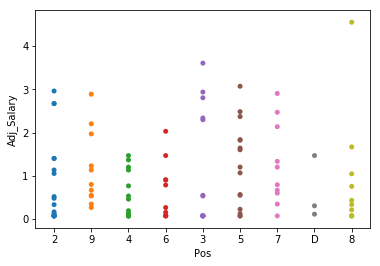

In [841]:
sns.stripplot(x="Pos", y="Adj_Salary", data=batters_only)

In [842]:
salary_df = batters_only.sort_values(by='Adj_Salary', ascending=False)
salary_df[:10]

,level_0,index,Games_Played,Plate_Appearances,At_Bats,Runs,Hits,2B,3B,HR,...,Catcher,First_Base,Second_Base,Third_Base,Shortstop,Left_Field,Center_Field,Right_Field,DH,Doubles
Player_Name,,,,,,,,,,,,,,,,,,,,,
Mike Trout,208,208,132.142857,580.714286,485.571429,98.857143,148.571429,28.571429,5.714286,28.714286,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,28.571429
Albert Pujols,10,10,145.285714,629.428571,571.142857,76.714286,152.571429,27.571429,0.142857,29.428571,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.571429
Josh Donaldson,143,143,136.166667,594.000000,512.166667,87.500000,142.500000,29.666667,2.000000,28.833333,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,29.666667
Buster Posey,42,42,132.000000,542.857143,478.428571,63.714286,148.142857,28.714286,0.857143,15.714286,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.714286
Ian Desmond,109,109,143.285714,597.142857,548.142857,72.857143,146.285714,27.285714,2.714286,17.857143,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.285714
Matt Kemp,192,192,130.714286,544.857143,495.142857,73.857143,141.285714,28.714286,1.857143,24.285714,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,28.714286
Bryce Harper,40,40,128.000000,543.666667,459.333333,84.500000,130.833333,24.833333,3.000000,25.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,24.833333
Eric Hosmer,89,89,149.714286,627.571429,570.142857,78.142857,161.714286,29.428571,2.285714,18.142857,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.428571
Russell Martin,232,232,121.857143,476.285714,408.428571,55.714286,96.571429,18.142857,0.285714,17.285714,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.142857


Series([], Name: Salary, dtype: int64)

In [844]:
batters_only_df = batters_only[['Runs', 'Hits', 'Doubles', 'HR', 'RBI', 'BA', 'OBP', 'SLG',
                                'OPS', 'SB', 'TB', 'SF', 'Adj_Salary', 'Age', 'Total_games_played',
                                'dWAR','All_star_count','Catcher','First_Base','Second_Base','Third_Base',
                                'Shortstop','Left_Field','Center_Field','Right_Field','DH','Team']]

In [845]:
batters_only_df.corr()

,Runs,Hits,Doubles,HR,RBI,BA,OBP,SLG,OPS,SB,...,All_star_count,Catcher,First_Base,Second_Base,Third_Base,Shortstop,Left_Field,Center_Field,Right_Field,DH
Runs,1.000000,0.951604,0.932293,0.847714,0.922343,0.477274,0.509690,0.472393,0.538839,0.561821,...,0.625045,-0.361758,0.043519,-0.061077,0.077478,-0.019100,0.228667,-0.050727,0.279176,-0.075191
Hits,0.951604,1.000000,0.960226,0.774643,0.926700,0.527163,0.472174,0.427881,0.492117,0.478685,...,0.606445,-0.320382,0.044361,-0.057405,0.095330,0.038968,0.182016,-0.083806,0.199724,-0.035232
Doubles,0.932293,0.960226,1.000000,0.787338,0.918755,0.477611,0.443054,0.447431,0.495065,0.414547,...,0.590937,-0.318355,0.050118,-0.084979,0.128502,0.023575,0.203465,-0.113156,0.208049,-0.035570
HR,0.847714,0.774643,0.787338,1.000000,0.928913,0.344642,0.392920,0.583482,0.574358,0.312323,...,0.541165,-0.257379,0.156489,-0.248404,0.108408,-0.051921,0.253487,-0.090018,0.188740,0.032511
RBI,0.922343,0.926700,0.918755,0.928913,1.000000,0.439290,0.442591,0.511958,0.541658,0.332989,...,0.607793,-0.245110,0.140687,-0.179031,0.137439,-0.021006,0.211523,-0.155549,0.160440,0.022352
BA,0.477274,0.527163,0.477611,0.344642,0.439290,1.000000,0.759412,0.771329,0.851760,0.300899,...,0.349703,-0.342435,0.075622,0.078991,0.137286,0.019840,0.067294,-0.065014,0.103907,-0.033739
OBP,0.509690,0.472174,0.443054,0.392920,0.442591,0.759412,1.000000,0.583653,0.808447,0.253116,...,0.397974,-0.275098,0.117174,-0.010324,0.108256,-0.039347,0.089332,-0.081832,0.167127,-0.043684
SLG,0.472393,0.427881,0.447431,0.583482,0.511958,0.771329,0.583653,1.000000,0.949773,0.214885,...,0.342245,-0.346257,0.123116,-0.155131,0.200295,-0.034226,0.137171,-0.067235,0.148433,0.125295
OPS,0.538839,0.492117,0.495065,0.574358,0.541658,0.851760,0.808447,0.949773,1.000000,0.253306,...,0.401449,-0.357001,0.134397,-0.116423,0.186902,-0.039972,0.133855,-0.080272,0.171999,0.073983
SB,0.561821,0.478685,0.414547,0.312323,0.332989,0.300899,0.253116,0.214885,0.253306,1.000000,...,0.338018,-0.340133,-0.064985,0.033410,-0.196774,0.035074,0.099865,0.321885,0.305730,-0.133669


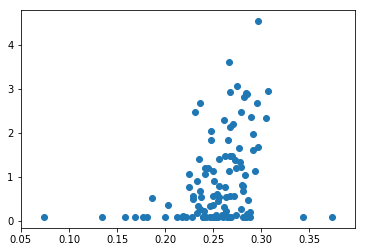

In [846]:
plt.scatter(batters_only_df['BA'], batters_only_df['Adj_Salary'])

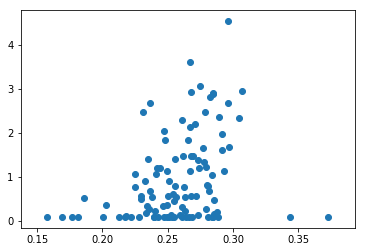

In [847]:
batters_only_df = batters_only_df[batters_only_df['BA'] > 0.15]

plt.scatter(batters_only_df['BA'], batters_only_df['Adj_Salary'])

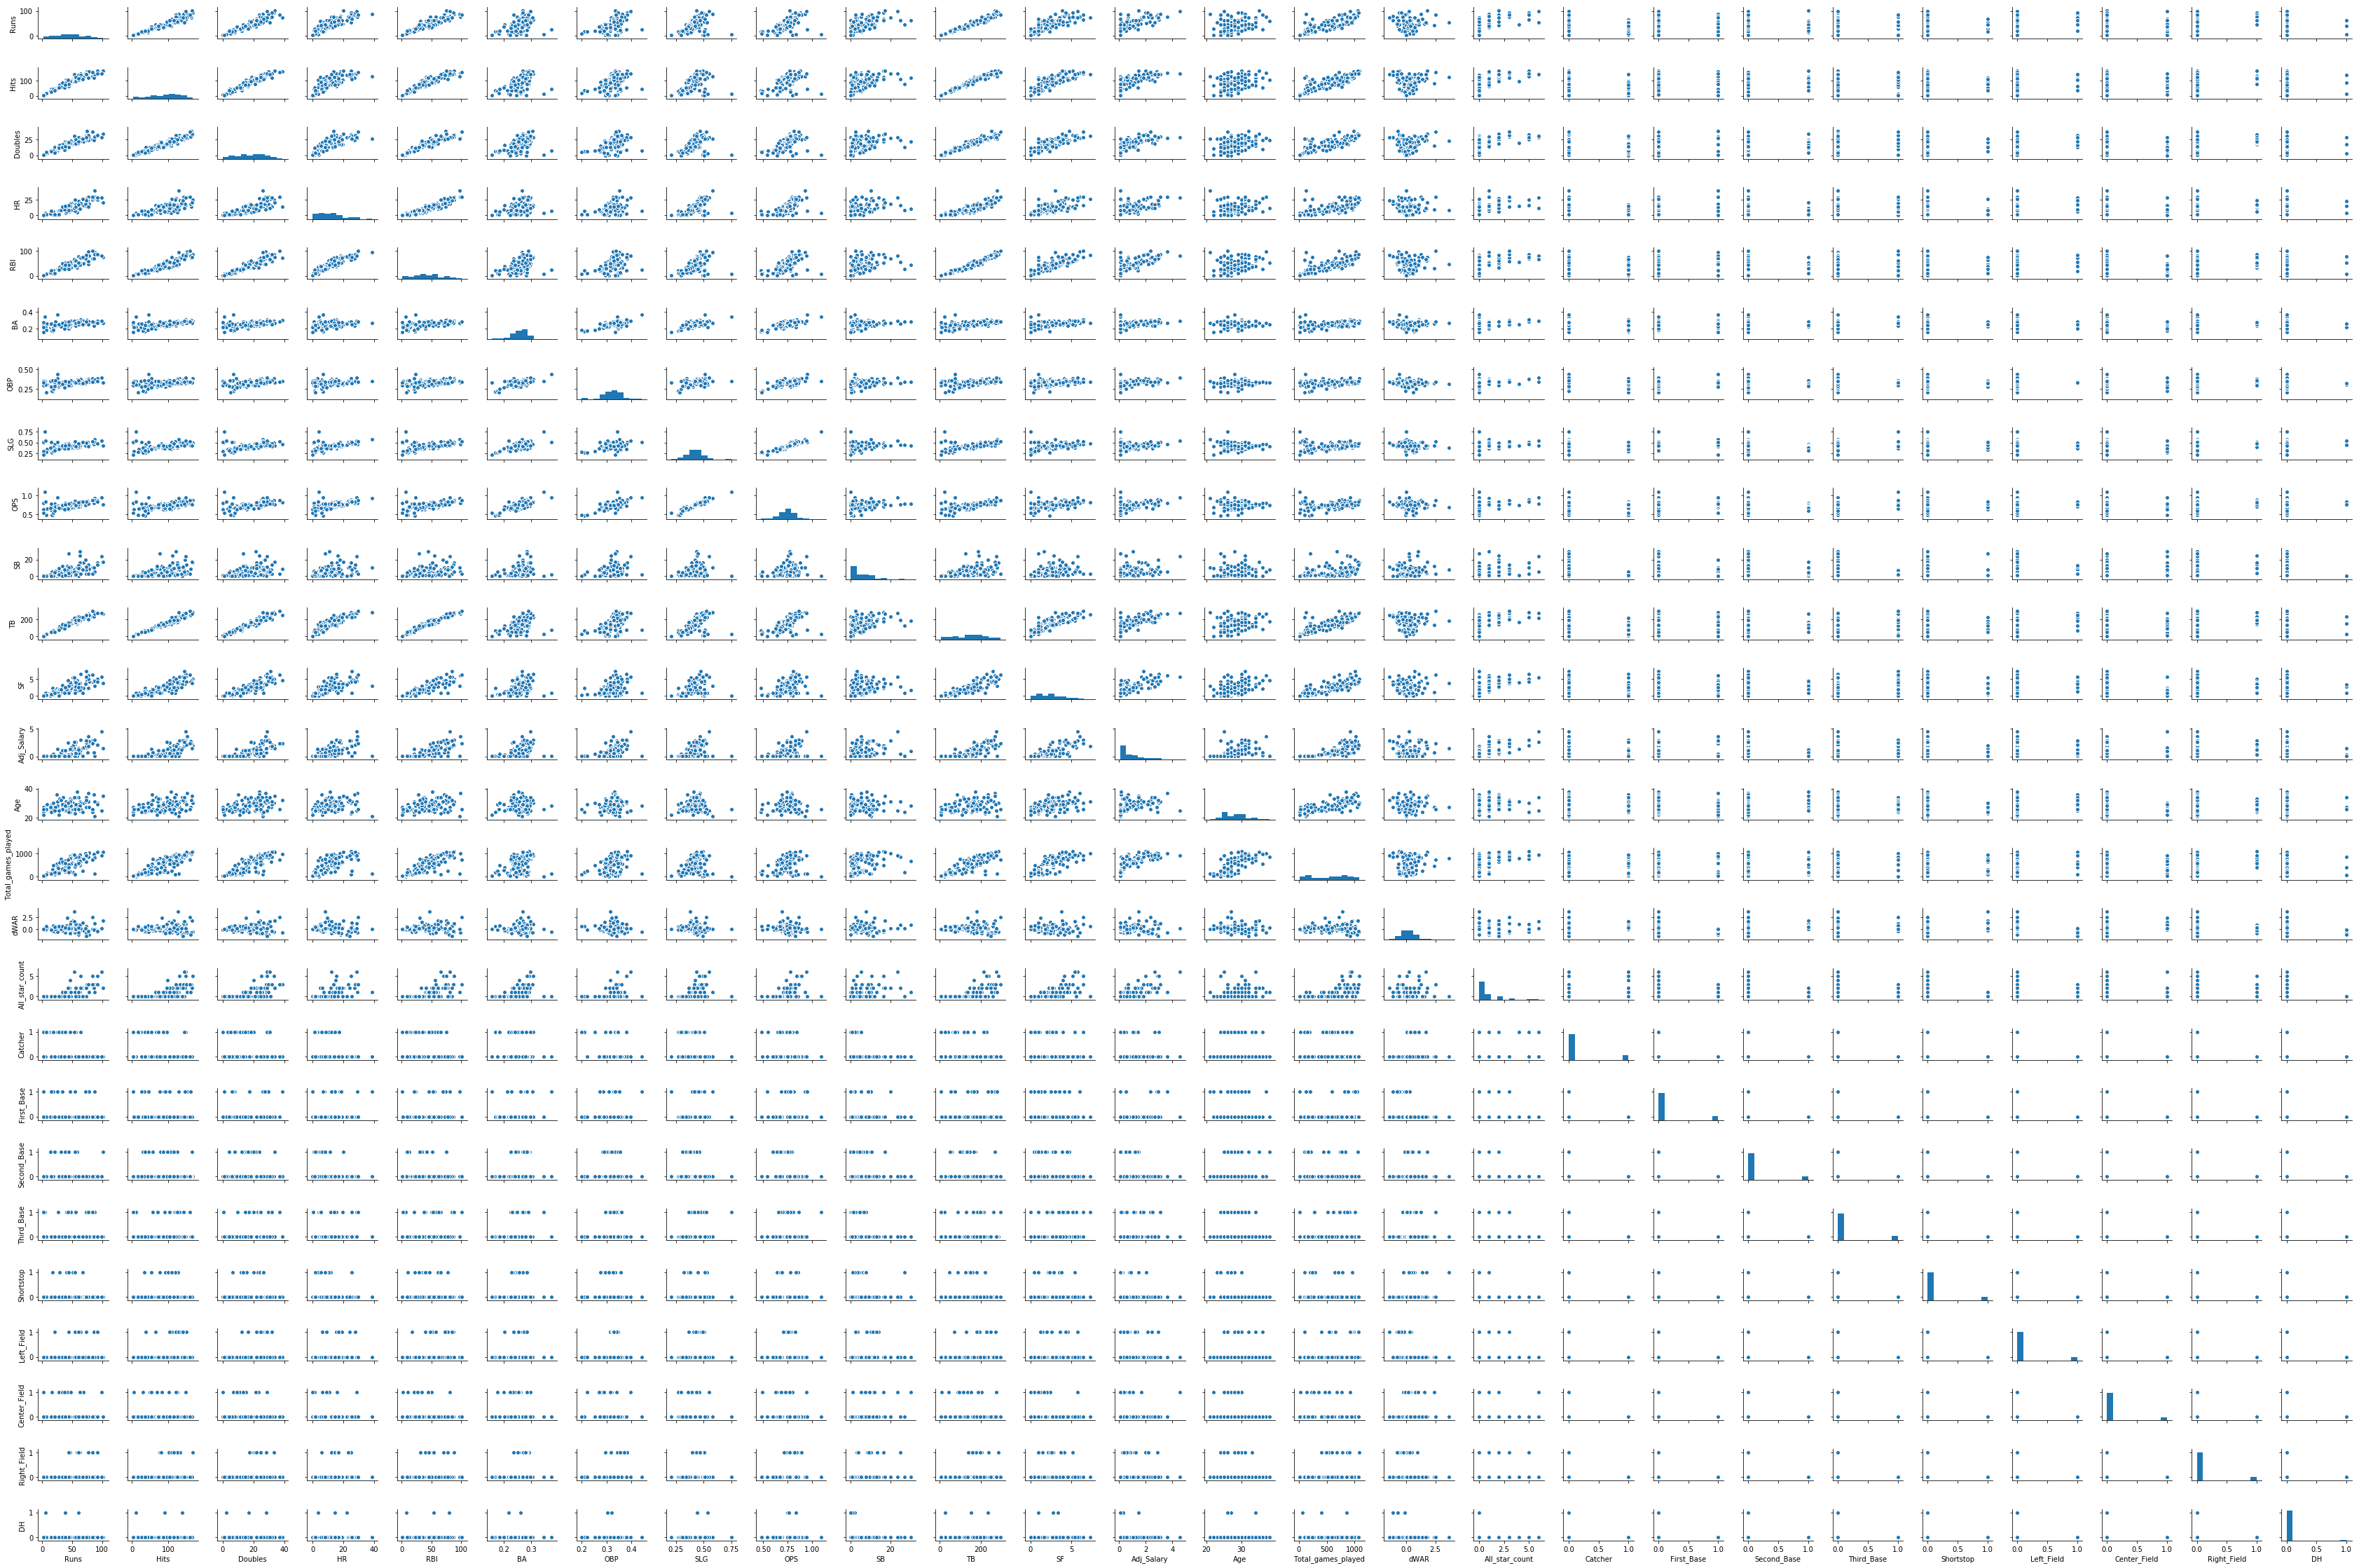

In [848]:
sns.pairplot(batters_only_df, size=1.2, aspect=1.5)

In [849]:
y, X = patsy.dmatrices('Adj_Salary ~ Runs + Hits + Doubles + HR + RBI + BA + OBP + SLG + OPS + SB + TB + SF + Age + Total_games_played + All_star_count + dWAR',
                       data=batters_only_df, return_type="dataframe")

model = sm.OLS(y, X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Adj_Salary   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     17.24
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           3.34e-20
Time:                        19:55:39   Log-Likelihood:                -75.728
No. Observations:                 105   AIC:                             183.5
Df Residuals:                      89   BIC:                             225.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.3622      0.862      0.420      0.675      -1.350       2.075
Runs                  -0.0020      0.013     -0.151      0.880      -0.028       0.024
Hits                   0.0155      0.029      0.528      0.599      -0.043       0.074
Doubles               -0.0245      0.032     -0.775      0.440      -0.087       0.038
HR                     0.0111      0.080      0.138      0.891      -0.148       0.171
RBI                    0.0187      0.016      1.152      0.252      -0.014       0.051
BA                    -1.5747      4.436     -0.355      0.723     -10.390       7.240
OBP                    1.1996      1.600      0.750      0.455      -1.979       4.379
SLG                   -0.0429      1.231     -0.035      0.972      -2.488       2.402
OPS                    1.1567      1.115      1.038      0.302      -1.058       3.372
SB                     0.0015      0.014      0.112      0.911      -0.026       0.029
TB                    -0.0135      0.026     -0.515      0.608      -0.066       0.039
SF                     0.0965      0.068      1.422      0.159      -0.038       0.231
Age                   -0.0542      0.027     -2.010      0.047      -0.108      -0.001
Total_games_played     0.0019      0.001      3.778      0.000       0.001       0.003
All_star_count         0.2090      0.055      3.787      0.000       0.099       0.319
dWAR                  -0.0067      0.074     -0.090      0.928      -0.154       0.141
==============================================================================
Omnibus:                        4.965   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.084   Jarque-Bera (JB):                5.992
Skew:                           0.198   Prob(JB):                       0.0500
Kurtosis:                       4.101   Cond. No.                     1.37e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.49e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

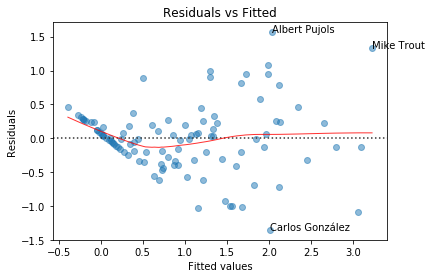

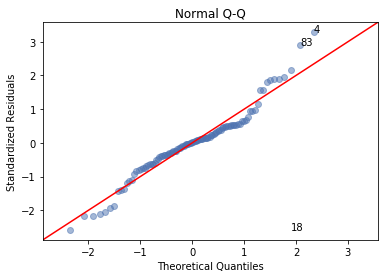

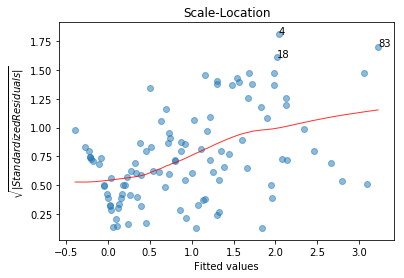

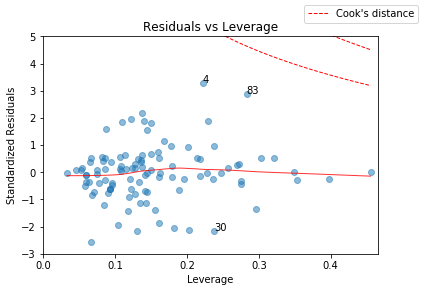

In [850]:
diagnostic_plots.diagnostic_plots(batters_only_df.drop(
    'Adj_Salary', axis=1), batters_only_df['Adj_Salary'], fit)

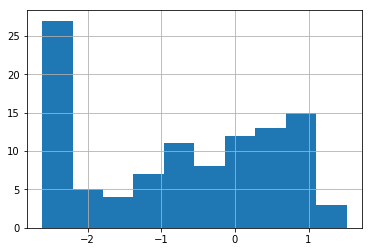

In [851]:
batters_only_df['log_salary'] = np.log(batters_only_df.Adj_Salary)

batters_only_df.log_salary.hist()

In [852]:
y, X = patsy.dmatrices('log_salary ~ Runs + Hits + Doubles + HR + RBI + BA + OBP + SLG + OPS + SB + TB + SF + Age + Total_games_played + All_star_count + dWAR',
                       data=batters_only_df, return_type="dataframe")

model2 = sm.OLS(y, X)
fit2 = model2.fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_salary   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     35.40
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           5.37e-31
Time:                        19:55:46   Log-Likelihood:                -77.760
No. Observations:                 105   AIC:                             187.5
Df Residuals:                      89   BIC:                             230.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.9039      0.879     -2.167      0.033      -3.650      -0.158
Runs                  -0.0171      0.014     -1.266      0.209      -0.044       0.010
Hits                   0.0482      0.030      1.605      0.112      -0.011       0.108
Doubles               -0.0014      0.032     -0.045      0.964      -0.065       0.063
HR                     0.0962      0.082      1.176      0.243      -0.066       0.259
RBI                   -0.0270      0.017     -1.633      0.106      -0.060       0.006
BA                    -5.7703      4.523     -1.276      0.205     -14.758       3.217
OBP                    2.2203      1.631      1.361      0.177      -1.021       5.461
SLG                    0.1713      1.255      0.137      0.892      -2.322       2.664
OPS                    2.3916      1.137      2.104      0.038       0.133       4.650
SB                    -0.0203      0.014     -1.453      0.150      -0.048       0.007
TB                    -0.0224      0.027     -0.835      0.406      -0.076       0.031
SF                     0.0516      0.069      0.746      0.458      -0.086       0.189
Age                   -0.0816      0.028     -2.966      0.004      -0.136      -0.027
Total_games_played     0.0039      0.001      7.578      0.000       0.003       0.005
All_star_count         0.0542      0.056      0.964      0.338      -0.058       0.166
dWAR                   0.0611      0.076      0.809      0.421      -0.089       0.211
==============================================================================
Omnibus:                        2.106   Durbin-Watson:                   2.131
Prob(Omnibus):                  0.349   Jarque-Bera (JB):                1.547
Skew:                          -0.189   Prob(JB):                        0.461
Kurtosis:                       3.460   Cond. No.                     1.37e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.49e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

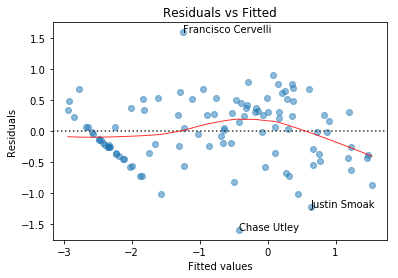

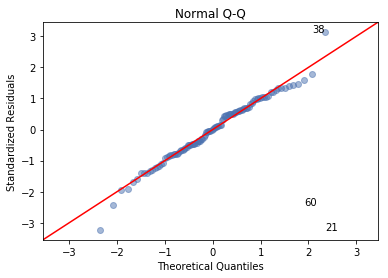

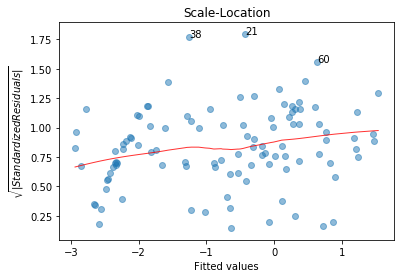

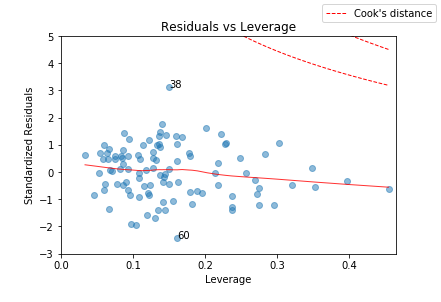

In [853]:
diagnostic_plots.diagnostic_plots(batters_only_df.drop(
    'log_salary', axis=1), batters_only_df['log_salary'], fit2)

In [854]:
y, X = patsy.dmatrices('log_salary ~ Runs + Hits + HR + RBI + BA + OBP + OPS + SB + TB + Age + Total_games_played + All_star_count + dWAR',
                       data=batters_only_df, return_type="dataframe")

model3 = sm.OLS(y, X)

fit3 = model3.fit()

fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_salary   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     41.46
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           1.69e-32
Time:                        19:55:47   Log-Likelihood:                -78.087
No. Observations:                 105   AIC:                             184.2
Df Residuals:                      91   BIC:                             221.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.8771      0.869     -2.161      0.033      -3.602      -0.152
Runs                  -0.0161      0.013     -1.212      0.228      -0.042       0.010
Hits                   0.0488      0.025      1.977      0.051      -0.000       0.098
HR                     0.0930      0.060      1.562      0.122      -0.025       0.211
RBI                   -0.0233      0.015     -1.513      0.134      -0.054       0.007
BA                    -5.6789      4.473     -1.270      0.207     -14.564       3.206
OBP                    1.9394      2.650      0.732      0.466      -3.325       7.204
OPS                    2.5567      1.735      1.473      0.144      -0.891       6.004
SB                    -0.0221      0.013     -1.665      0.099      -0.049       0.004
TB                    -0.0234      0.019     -1.209      0.230      -0.062       0.015
Age                   -0.0822      0.027     -3.058      0.003      -0.136      -0.029
Total_games_played     0.0040      0.001      7.878      0.000       0.003       0.005
All_star_count         0.0633      0.054      1.168      0.246      -0.044       0.171
dWAR                   0.0660      0.075      0.884      0.379      -0.082       0.214
==============================================================================
Omnibus:                        1.796   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.407   Jarque-Bera (JB):                1.241
Skew:                          -0.188   Prob(JB):                        0.538
Kurtosis:                       3.378   Cond. No.                     5.84e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.84e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

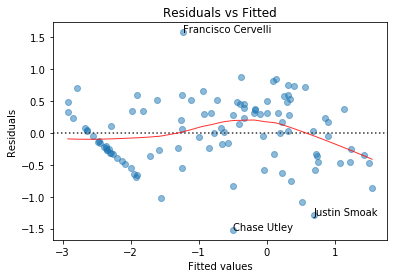

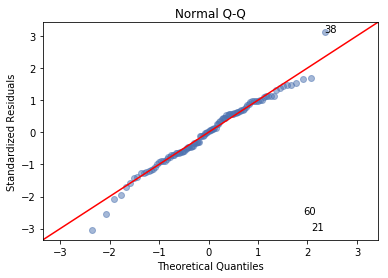

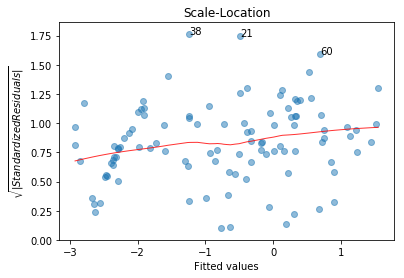

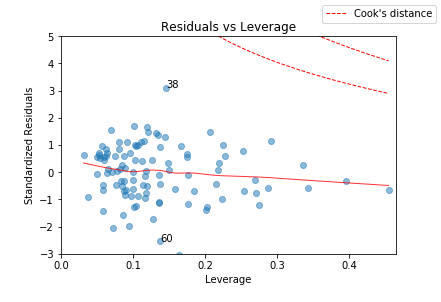

In [855]:
diagnostic_plots.diagnostic_plots(batters_only_df.drop(
    'log_salary', axis=1), batters_only_df['log_salary'], fit3)

In [856]:
y, X = patsy.dmatrices('log_salary ~ Runs + Hits + HR + RBI + BA + OPS + SB + TB + Age + Total_games_played + dWAR',
                       data=batters_only_df, return_type="dataframe")

model4 = sm.OLS(y, X)

fit4 = model4.fit()

fit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_salary   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     48.76
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           9.46e-34
Time:                        19:55:48   Log-Likelihood:                -79.275
No. Observations:                 105   AIC:                             182.6
Df Residuals:                      93   BIC:                             214.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.7209      0.813     -2.117      0.037      -3.335      -0.107
Runs                  -0.0096      0.012     -0.809      0.420      -0.033       0.014
Hits                   0.0529      0.024      2.168      0.033       0.004       0.101
HR                     0.0984      0.059      1.655      0.101      -0.020       0.216
RBI                   -0.0195      0.015     -1.285      0.202      -0.050       0.011
BA                    -5.3791      4.468     -1.204      0.232     -14.252       3.494
OPS                    3.2445      1.573      2.062      0.042       0.120       6.369
SB                    -0.0231      0.013     -1.762      0.081      -0.049       0.003
TB                    -0.0294      0.019     -1.567      0.121      -0.067       0.008
Age                   -0.0883      0.026     -3.342      0.001      -0.141      -0.036
Total_games_played     0.0042      0.000      8.622      0.000       0.003       0.005
dWAR                   0.0731      0.074      0.988      0.326      -0.074       0.220
==============================================================================
Omnibus:                        1.703   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.427   Jarque-Bera (JB):                1.164
Skew:                          -0.151   Prob(JB):                        0.559
Kurtosis:                       3.419   Cond. No.                     5.83e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.83e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

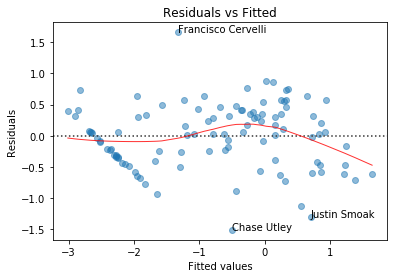

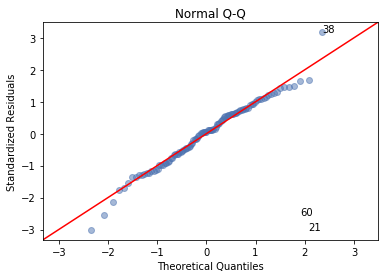

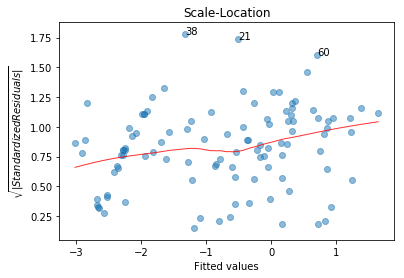

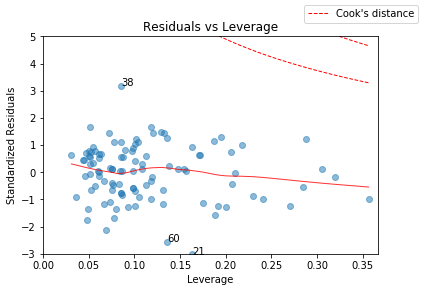

In [857]:
diagnostic_plots.diagnostic_plots(batters_only_df.drop(
    'log_salary', axis=1), batters_only_df['log_salary'], fit4)

In [858]:
y, X = patsy.dmatrices('log_salary ~ Hits + HR + RBI + BA + OPS + SB + TB + Age + dWAR + Total_games_played',
                       data=batters_only_df, return_type="dataframe")

model5 = sm.OLS(y, X)

fit5 = model5.fit()

fit5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_salary   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     53.77
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           1.73e-34
Time:                        19:55:49   Log-Likelihood:                -79.644
No. Observations:                 105   AIC:                             181.3
Df Residuals:                      94   BIC:                             210.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.6777      0.810     -2.072      0.041      -3.285      -0.070
Hits                   0.0558      0.024      2.313      0.023       0.008       0.104
HR                     0.1061      0.059      1.811      0.073      -0.010       0.222
RBI                   -0.0178      0.015     -1.188      0.238      -0.048       0.012
BA                    -4.7812      4.399     -1.087      0.280     -13.515       3.952
OPS                    3.0372      1.550      1.960      0.053      -0.039       6.114
SB                    -0.0277      0.012     -2.351      0.021      -0.051      -0.004
TB                    -0.0351      0.017     -2.022      0.046      -0.070      -0.001
Age                   -0.0895      0.026     -3.402      0.001      -0.142      -0.037
dWAR                   0.0813      0.073      1.111      0.269      -0.064       0.226
Total_games_played     0.0041      0.000      8.616      0.000       0.003       0.005
==============================================================================
Omnibus:                        1.581   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.454   Jarque-Bera (JB):                1.050
Skew:                          -0.179   Prob(JB):                        0.592
Kurtosis:                       3.333   Cond. No.                     5.73e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

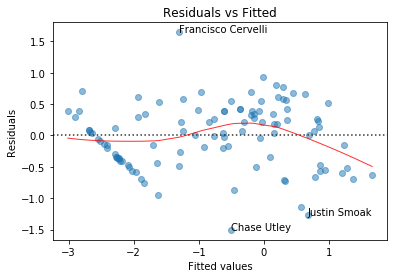

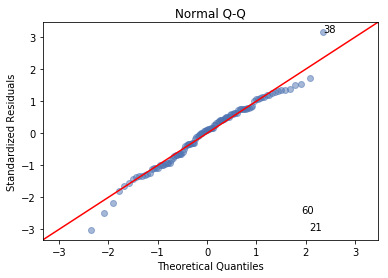

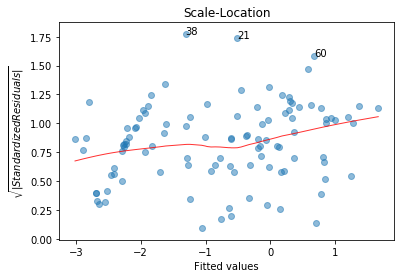

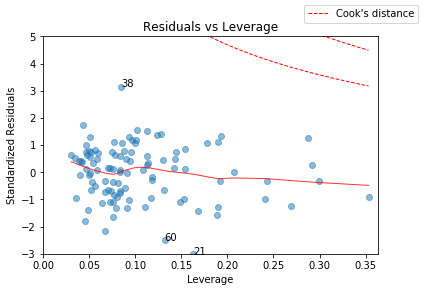

In [859]:
diagnostic_plots.diagnostic_plots(batters_only_df.drop(
    'log_salary', axis=1), batters_only_df['log_salary'], fit5)

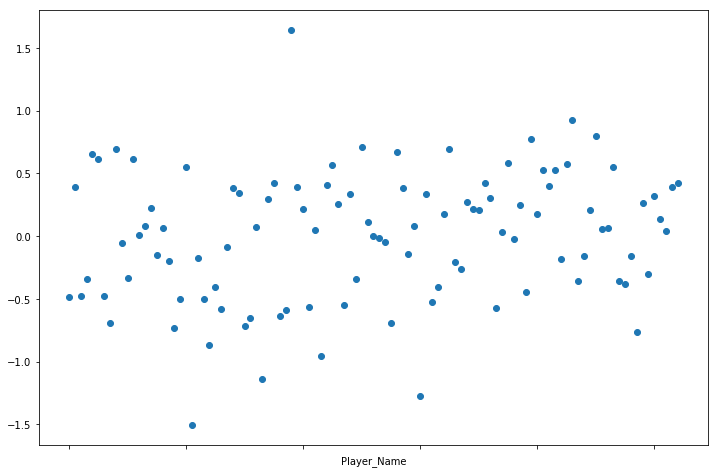

In [860]:
fit5.resid.plot(style='o', figsize=(12, 8))

In [861]:
y, X = patsy.dmatrices('log_salary ~ Hits + HR + RBI + BA + OPS + SB + TB + Age + dWAR + Total_games_played + Catcher + First_Base + Second_Base + Third_Base + Shortstop + Left_Field + Center_Field + Right_Field + DH',
                       data=batters_only_df, return_type="dataframe")

model6 = sm.OLS(y, X)

fit6 = model6.fit()

fit6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_salary   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     32.48
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           9.58e-31
Time:                        19:55:50   Log-Likelihood:                -71.828
No. Observations:                 105   AIC:                             181.7
Df Residuals:                      86   BIC:                             232.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.1284      0.730     -1.545      0.126      -2.580       0.323
Hits                   0.0406      0.025      1.657      0.101      -0.008       0.089
HR                     0.0723      0.058      1.241      0.218      -0.043       0.188
RBI                   -0.0247      0.016     -1.526      0.131      -0.057       0.007
BA                    -2.7978      4.545     -0.616      0.540     -11.832       6.237
OPS                    2.2937      1.624      1.412      0.162      -0.936       5.523
SB                    -0.0264      0.012     -2.129      0.036      -0.051      -0.002
TB                    -0.0202      0.018     -1.117      0.267      -0.056       0.016
Age                   -0.1085      0.027     -4.013      0.000      -0.162      -0.055
dWAR                   0.0035      0.090      0.039      0.969      -0.176       0.183
Total_games_played     0.0042      0.000      8.661      0.000       0.003       0.005
Catcher                0.2477      0.193      1.281      0.204      -0.137       0.632
First_Base            -0.3252      0.171     -1.907      0.060      -0.664       0.014
Second_Base           -0.3546      0.180     -1.975      0.051      -0.711       0.002
Third_Base             0.0453      0.176      0.258      0.797      -0.304       0.394
Shortstop             -0.3796      0.183     -2.074      0.041      -0.743      -0.016
Left_Field            -0.1752      0.193     -0.909      0.366      -0.558       0.208
Center_Field           0.0070      0.196      0.036      0.972      -0.382       0.396
Right_Field           -0.2745      0.190     -1.447      0.152      -0.652       0.103
DH                     0.0807      0.329      0.245      0.807      -0.573       0.735
==============================================================================
Omnibus:                        0.315   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.854   Jarque-Bera (JB):                0.156
Skew:                          -0.093   Prob(JB):                        0.925
Kurtosis:                       3.029   Cond. No.                     7.12e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.08e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

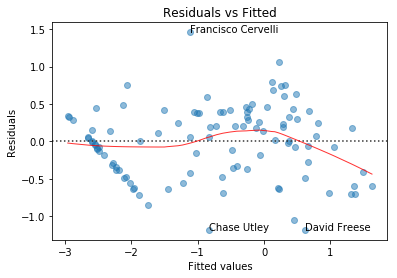

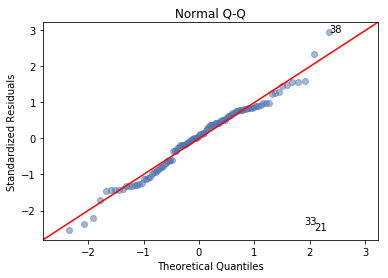

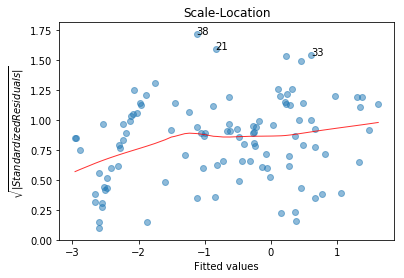

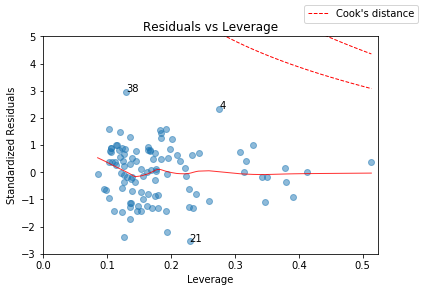

In [862]:
diagnostic_plots.diagnostic_plots(batters_only_df.drop(
    'log_salary', axis=1), batters_only_df['log_salary'], fit6)

In [863]:
y, X = patsy.dmatrices('log_salary ~ Hits + HR + RBI + BA + OPS + SB + TB + Age + dWAR + Total_games_played + Catcher + First_Base + Second_Base + Third_Base + Shortstop + Left_Field + Right_Field',
                       data=batters_only_df, return_type="dataframe")

model7 = sm.OLS(y, X)

fit7 = model7.fit()

fit7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_salary   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     34.78
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           1.62e-31
Time:                        19:55:51   Log-Likelihood:                -71.847
No. Observations:                 105   AIC:                             179.7
Df Residuals:                      87   BIC:                             227.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.1176      0.811     -1.379      0.171      -2.729       0.493
Hits                   0.0413      0.024      1.714      0.090      -0.007       0.089
HR                     0.0725      0.058      1.252      0.214      -0.043       0.188
RBI                   -0.0241      0.016     -1.534      0.129      -0.055       0.007
BA                    -2.9880      4.394     -0.680      0.498     -11.721       5.745
OPS                    2.3742      1.552      1.530      0.130      -0.711       5.459
SB                    -0.0268      0.012     -2.224      0.029      -0.051      -0.003
TB                    -0.0208      0.018     -1.175      0.243      -0.056       0.014
Age                   -0.1083      0.027     -4.032      0.000      -0.162      -0.055
dWAR                   0.0001      0.088      0.001      0.999      -0.175       0.175
Total_games_played     0.0042      0.000      8.729      0.000       0.003       0.005
Catcher                0.2188      0.232      0.943      0.348      -0.242       0.680
First_Base            -0.3572      0.233     -1.530      0.130      -0.821       0.107
Second_Base           -0.3769      0.216     -1.747      0.084      -0.806       0.052
Third_Base             0.0148      0.224      0.066      0.948      -0.431       0.461
Shortstop             -0.4024      0.226     -1.778      0.079      -0.852       0.047
Left_Field            -0.2032      0.245     -0.830      0.409      -0.690       0.284
Right_Field           -0.2982      0.232     -1.283      0.203      -0.760       0.164
==============================================================================
Omnibus:                        0.367   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.832   Jarque-Bera (JB):                0.213
Skew:                          -0.110   Prob(JB):                        0.899
Kurtosis:                       3.021   Cond. No.                     5.94e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

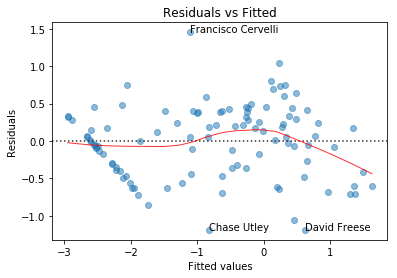

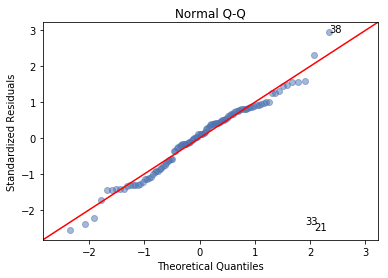

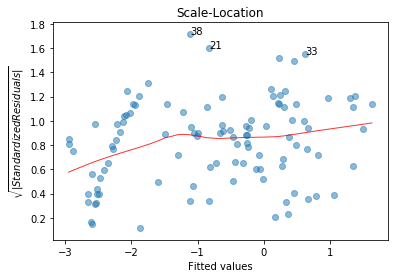

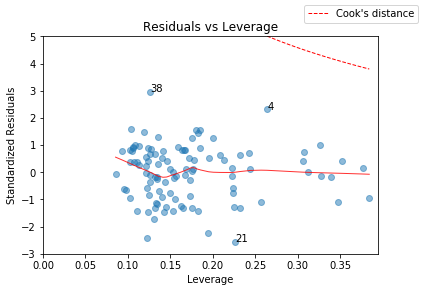

In [864]:
diagnostic_plots.diagnostic_plots(batters_only_df.drop(
    'log_salary', axis=1), batters_only_df['log_salary'], fit7)

In [865]:
y, X = patsy.dmatrices('log_salary ~ Hits + HR + RBI + OPS + SB + TB + Age + Total_games_played + Catcher + First_Base + Second_Base + Third_Base + Shortstop + Left_Field + Right_Field',
                       data=batters_only_df, return_type="dataframe")

model8 = sm.OLS(y, X)

fit8 = model8.fit()

fit8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_salary   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     40.08
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           5.04e-33
Time:                        19:55:52   Log-Likelihood:                -72.126
No. Observations:                 105   AIC:                             176.3
Df Residuals:                      89   BIC:                             218.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.1016      0.786     -1.402      0.164      -2.663       0.460
Hits                   0.0345      0.022      1.603      0.113      -0.008       0.077
HR                     0.0690      0.057      1.215      0.227      -0.044       0.182
RBI                   -0.0234      0.015     -1.509      0.135      -0.054       0.007
OPS                    1.4425      0.717      2.011      0.047       0.017       2.868
SB                    -0.0274      0.012     -2.306      0.023      -0.051      -0.004
TB                    -0.0172      0.017     -1.042      0.300      -0.050       0.016
Age                   -0.1102      0.026     -4.251      0.000      -0.162      -0.059
Total_games_played     0.0043      0.000      9.736      0.000       0.003       0.005
Catcher                0.1984      0.220      0.903      0.369      -0.238       0.635
First_Base            -0.3780      0.224     -1.690      0.094      -0.822       0.066
Second_Base           -0.4109      0.208     -1.979      0.051      -0.824       0.002
Third_Base             0.0034      0.221      0.016      0.988      -0.435       0.442
Shortstop             -0.4134      0.220     -1.876      0.064      -0.851       0.024
Left_Field            -0.2234      0.230     -0.972      0.334      -0.680       0.233
Right_Field           -0.3071      0.224     -1.370      0.174      -0.752       0.138
==============================================================================
Omnibus:                        0.439   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.803   Jarque-Bera (JB):                0.137
Skew:                          -0.051   Prob(JB):                        0.934
Kurtosis:                       3.145   Cond. No.                     1.20e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

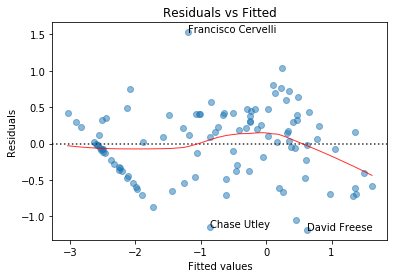

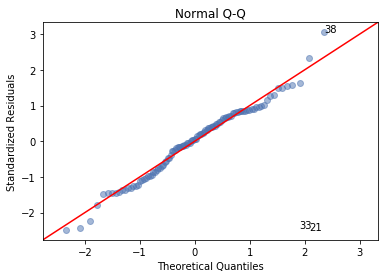

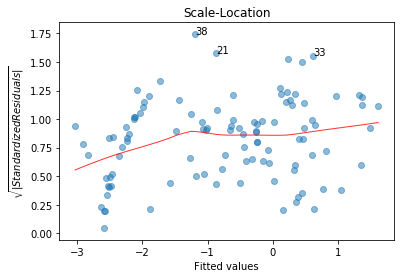

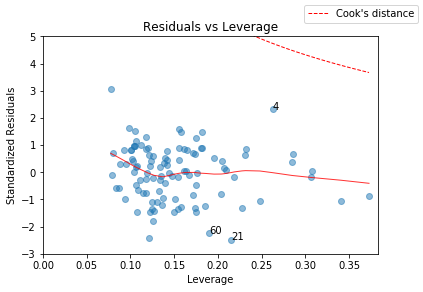

In [866]:
diagnostic_plots.diagnostic_plots(batters_only_df.drop(
    'log_salary', axis=1), batters_only_df['log_salary'], fit8)

In [867]:
y, X = patsy.dmatrices('log_salary ~ Hits + RBI + OPS + SB + Age + Total_games_played + Catcher + First_Base + Second_Base + Third_Base + Shortstop + Left_Field + Right_Field',
                       data=batters_only_df, return_type="dataframe")

model9 = sm.OLS(y, X)

fit9 = model9.fit()

fit9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_salary   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     46.39
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           2.22e-34
Time:                        19:55:53   Log-Likelihood:                -72.992
No. Observations:                 105   AIC:                             174.0
Df Residuals:                      91   BIC:                             211.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.0682      0.782     -1.365      0.175      -2.622       0.486
Hits                   0.0105      0.005      2.266      0.026       0.001       0.020
RBI                   -0.0138      0.007     -2.052      0.043      -0.027      -0.000
OPS                    1.4666      0.699      2.098      0.039       0.078       2.855
SB                    -0.0269      0.011     -2.377      0.020      -0.049      -0.004
Age                   -0.1113      0.026     -4.342      0.000      -0.162      -0.060
Total_games_played     0.0044      0.000      9.805      0.000       0.003       0.005
Catcher                0.1940      0.210      0.923      0.358      -0.224       0.611
First_Base            -0.3980      0.218     -1.829      0.071      -0.830       0.034
Second_Base           -0.4355      0.205     -2.122      0.037      -0.843      -0.028
Third_Base            -0.0260      0.216     -0.120      0.905      -0.456       0.404
Shortstop             -0.4472      0.218     -2.053      0.043      -0.880      -0.015
Left_Field            -0.2438      0.228     -1.069      0.288      -0.697       0.209
Right_Field           -0.3442      0.220     -1.565      0.121      -0.781       0.093
==============================================================================
Omnibus:                        0.538   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.764   Jarque-Bera (JB):                0.179
Skew:                          -0.023   Prob(JB):                        0.914
Kurtosis:                       3.197   Cond. No.                     1.16e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

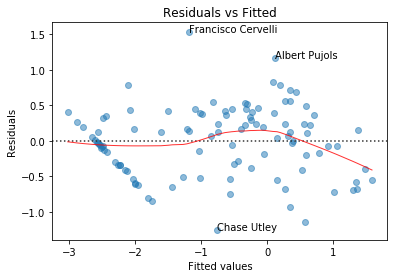

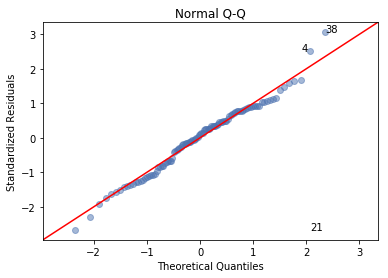

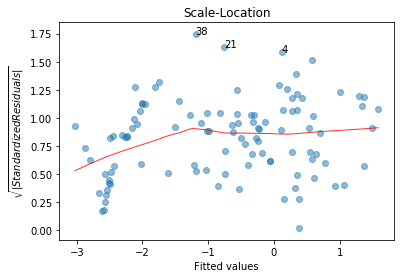

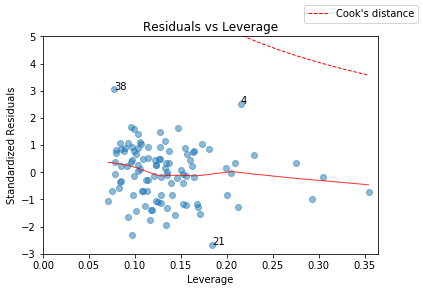

In [868]:
diagnostic_plots.diagnostic_plots(batters_only_df.drop(
    'log_salary', axis=1), batters_only_df['log_salary'], fit9)

In [869]:
y, X = patsy.dmatrices('log_salary ~ Hits + RBI + OPS + SB + Age + Total_games_played + First_Base + Second_Base + Third_Base + Shortstop + Left_Field + Right_Field',
                       data=batters_only_df, return_type="dataframe")

model10 = sm.OLS(y, X)

fit10 = model10.fit()

fit10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_salary   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     50.27
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           4.63e-35
Time:                        19:55:54   Log-Likelihood:                -73.481
No. Observations:                 105   AIC:                             173.0
Df Residuals:                      92   BIC:                             207.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.0028      0.779     -1.288      0.201      -2.549       0.543
Hits                   0.0101      0.005      2.186      0.031       0.001       0.019
RBI                   -0.0132      0.007     -1.971      0.052      -0.027       0.000
OPS                    1.4362      0.698      2.059      0.042       0.051       2.822
SB                    -0.0300      0.011     -2.782      0.007      -0.051      -0.009
Age                   -0.1086      0.025     -4.268      0.000      -0.159      -0.058
Total_games_played     0.0044      0.000      9.866      0.000       0.003       0.005
First_Base            -0.5033      0.185     -2.721      0.008      -0.871      -0.136
Second_Base           -0.5315      0.177     -3.009      0.003      -0.882      -0.181
Third_Base            -0.1382      0.179     -0.772      0.442      -0.494       0.217
Shortstop             -0.5376      0.194     -2.765      0.007      -0.924      -0.152
Left_Field            -0.3430      0.201     -1.707      0.091      -0.742       0.056
Right_Field           -0.4266      0.201     -2.124      0.036      -0.825      -0.028
==============================================================================
Omnibus:                        1.144   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.564   Jarque-Bera (JB):                0.656
Skew:                          -0.005   Prob(JB):                        0.720
Kurtosis:                       3.387   Cond. No.                     1.15e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

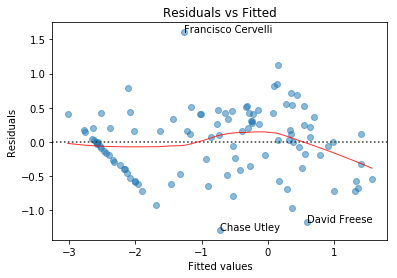

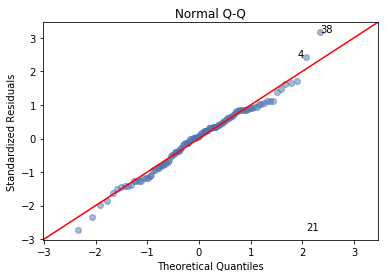

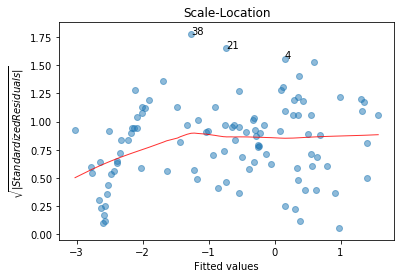

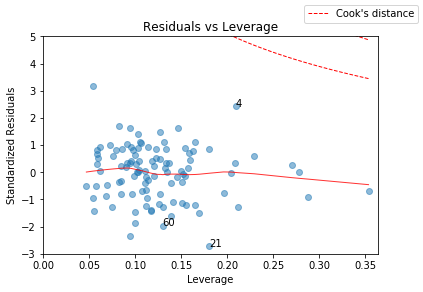

In [870]:
diagnostic_plots.diagnostic_plots(batters_only_df.drop(
    'log_salary', axis=1), batters_only_df['log_salary'], fit10)

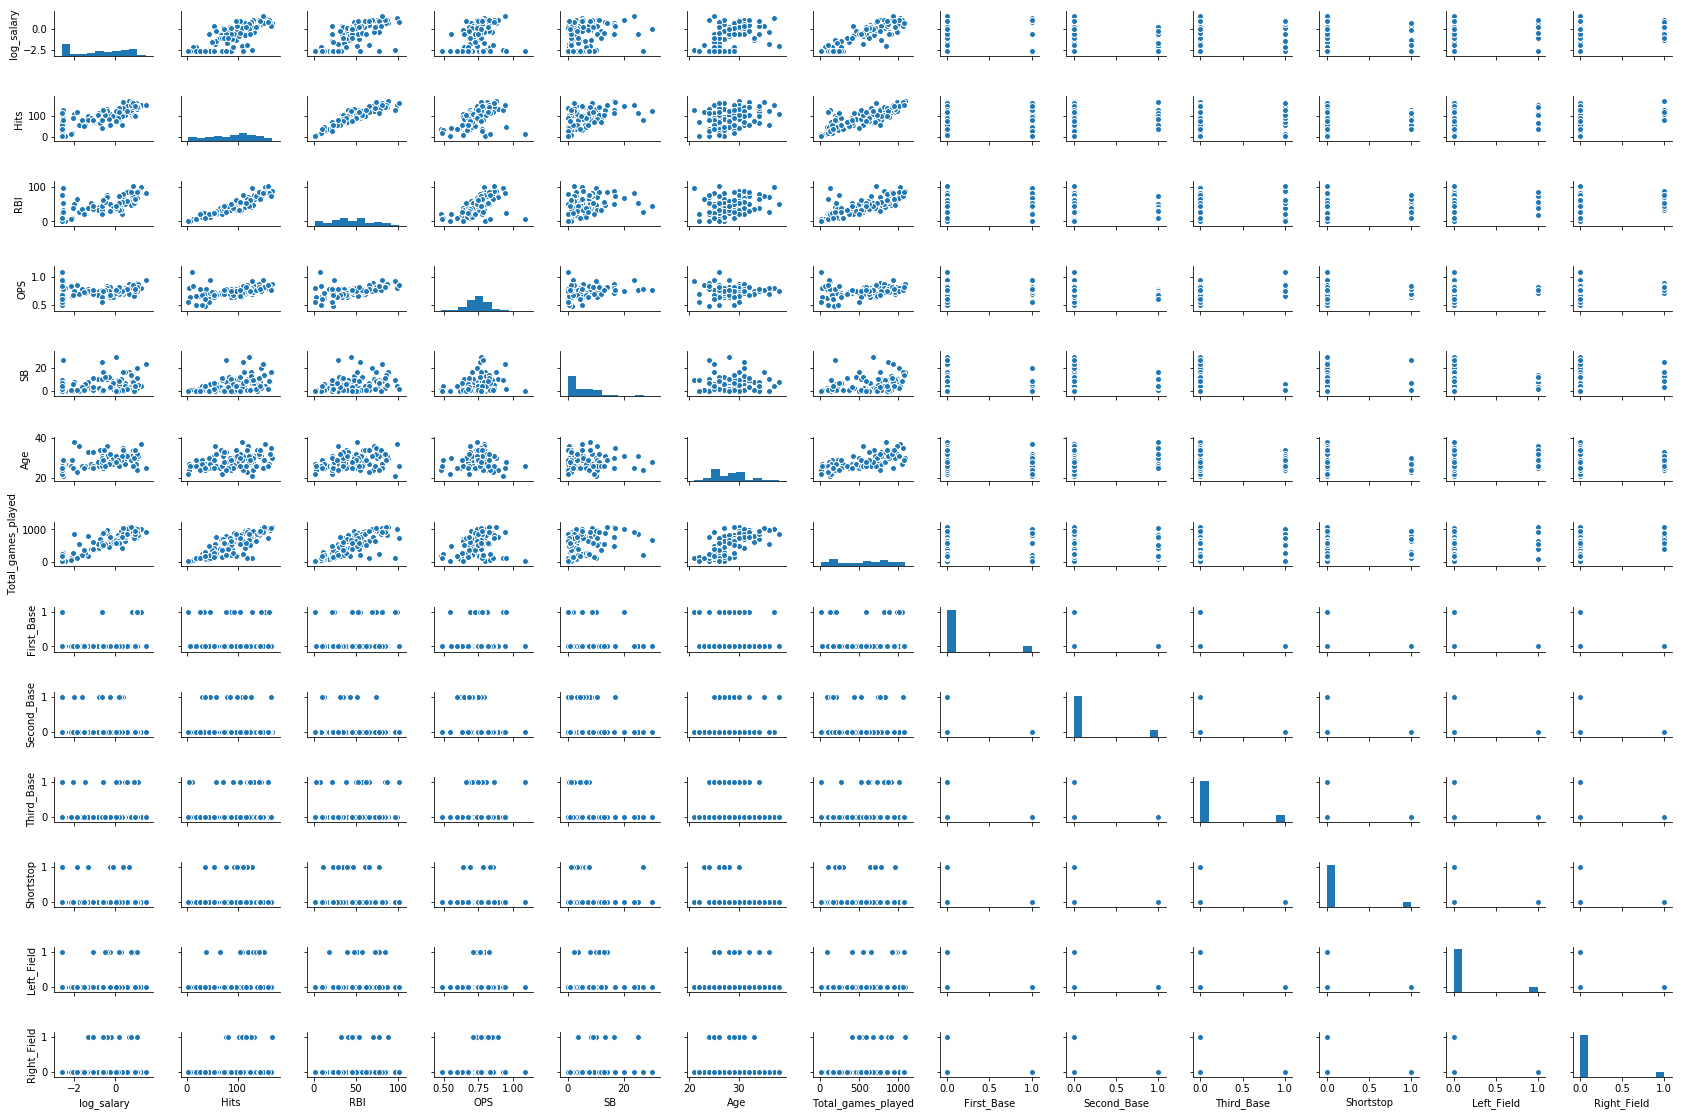

In [871]:
new_df = batters_only_df[['log_salary', 'Hits', 'RBI', 'OPS', 'SB', 'Age', 'Total_games_played', 'First_Base', 'Second_Base', 'Third_Base', 'Shortstop', 'Left_Field', 'Right_Field']]

sns.pairplot(new_df, size=1.2, aspect=1.5)

In [872]:
y, X = patsy.dmatrices('log_salary ~ Hits + RBI + OPS + SB + Age + Total_games_played + First_Base + Second_Base + Shortstop + Left_Field + Right_Field',
                       data=batters_only_df, return_type="dataframe")

model11 = sm.OLS(y, X)

fit11 = model11.fit()

fit11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_salary   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     55.03
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           8.13e-36
Time:                        19:56:12   Log-Likelihood:                -73.821
No. Observations:                 105   AIC:                             171.6
Df Residuals:                      93   BIC:                             203.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.0140      0.777     -1.306      0.195      -2.556       0.528
Hits                   0.0098      0.005      2.138      0.035       0.001       0.019
RBI                   -0.0130      0.007     -1.953      0.054      -0.026       0.000
OPS                    1.3162      0.679      1.940      0.055      -0.031       2.664
SB                    -0.0278      0.010     -2.679      0.009      -0.048      -0.007
Age                   -0.1061      0.025     -4.213      0.000      -0.156      -0.056
Total_games_played     0.0044      0.000      9.858      0.000       0.003       0.005
First_Base            -0.4485      0.170     -2.631      0.010      -0.787      -0.110
Second_Base           -0.4924      0.169     -2.916      0.004      -0.828      -0.157
Shortstop             -0.4906      0.184     -2.663      0.009      -0.856      -0.125
Left_Field            -0.2898      0.188     -1.539      0.127      -0.664       0.084
Right_Field           -0.3770      0.190     -1.986      0.050      -0.754   -4.16e-06
==============================================================================
Omnibus:                        1.708   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.426   Jarque-Bera (JB):                1.248
Skew:                          -0.016   Prob(JB):                        0.536
Kurtosis:                       3.533   Cond. No.                     1.15e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

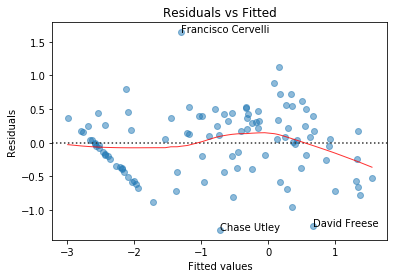

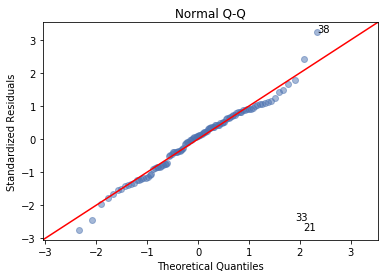

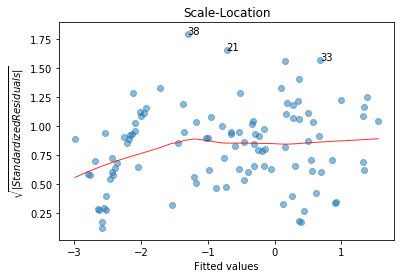

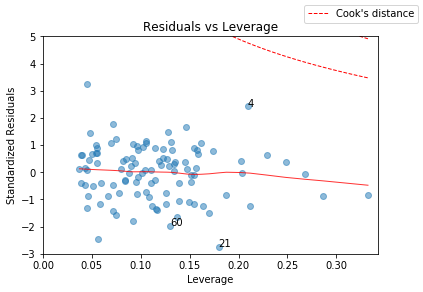

In [873]:
diagnostic_plots.diagnostic_plots(batters_only_df.drop(
    'log_salary', axis=1), batters_only_df['log_salary'], fit11)

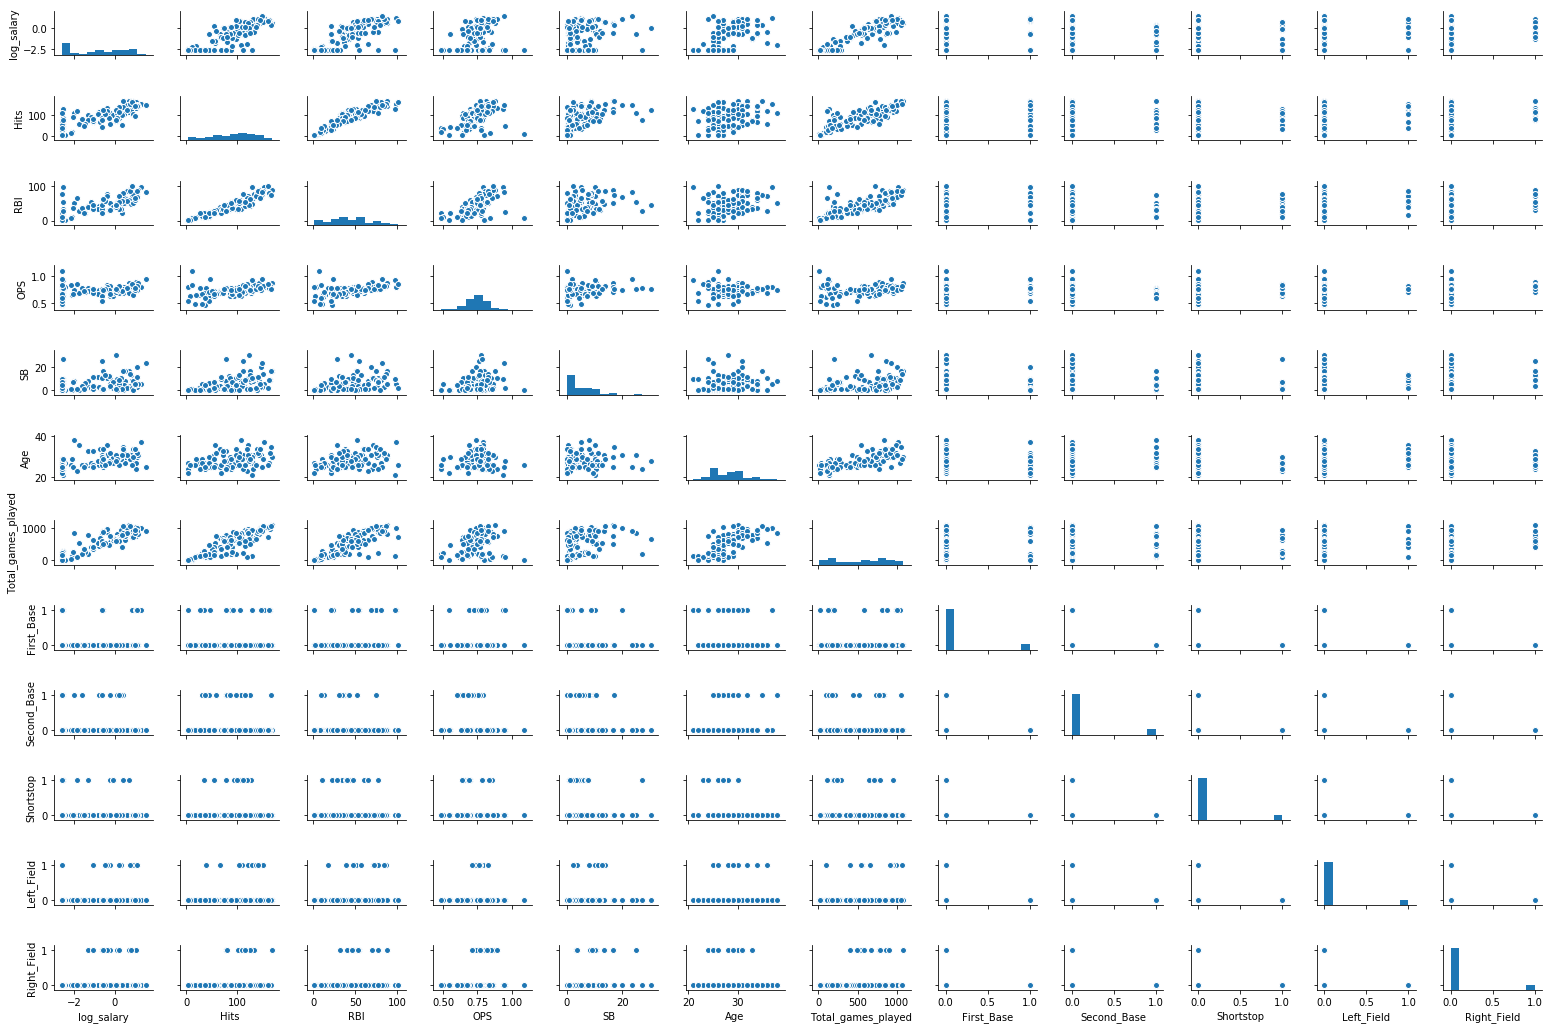

In [874]:
features = batters_only_df[['log_salary', 'Hits', 'RBI', 'OPS', 'SB', 'Age', 'Total_games_played', 'First_Base', 'Second_Base', 'Shortstop', 'Left_Field', 'Right_Field']]

sns.pairplot(features, size=1.2, aspect=1.5)

In [875]:
X2=patsy.dmatrix('Team',data=batters_only_df,return_type='dataframe')
X2.head()

,Intercept,Team[T.LAA],Team[T.LAD],Team[T.PIT],Team[T.SDP],Team[T.SFG],Team[T.STL],Team[T.TBR],Team[T.TOR],Team[T.WSN]
Player_Name,,,,,,,,,,
A.J. Ellis,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Adam Eaton,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Adam Frazier,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Adeiny Hechavarria,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Albert Pujols,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [876]:
batters_only_df=batters_only_df.join(X2)

In [877]:
batters_only_df['LAA'] = batters_only_df['Team[T.LAA]']
batters_only_df['LAD'] = batters_only_df['Team[T.LAD]']
batters_only_df['PIT'] = batters_only_df['Team[T.PIT]']
batters_only_df['SDP'] = batters_only_df['Team[T.SDP]']
batters_only_df['STL'] = batters_only_df['Team[T.STL]']
batters_only_df['TBR'] = batters_only_df['Team[T.TBR]']
batters_only_df['TOR'] = batters_only_df['Team[T.TOR]']
batters_only_df['WSN'] = batters_only_df['Team[T.WSN]']
batters_only_df['SFG'] = batters_only_df['Team[T.SFG]']

batters_only_df = batters_only_df.drop(['Team[T.LAA]','Team[T.LAD]','Team[T.PIT]',
                                        'Team[T.SDP]','Team[T.STL]','Team[T.TBR]',
                                        'Team[T.TOR]','Team[T.WSN]','Team[T.SFG]'],1)

In [878]:
batters_only_df.corr()

,Runs,Hits,Doubles,HR,RBI,BA,OBP,SLG,OPS,SB,...,Intercept,LAA,LAD,PIT,SDP,STL,TBR,TOR,WSN,SFG
Runs,1.000000,0.948762,0.928711,0.841901,0.918478,0.433835,0.484506,0.426618,0.512262,0.551710,...,NaN,0.190128,0.014591,-0.061955,-0.212544,-0.014472,-0.153719,0.087660,0.032413,0.079718
Hits,0.948762,1.000000,0.958145,0.765517,0.923288,0.487306,0.427529,0.369331,0.446477,0.465308,...,NaN,0.132849,-0.032700,-0.040334,-0.183193,-0.013793,-0.105163,0.069881,0.013697,0.142644
Doubles,0.928711,0.958145,1.000000,0.779309,0.915006,0.439518,0.406662,0.402030,0.464193,0.399230,...,NaN,0.129747,0.005491,-0.043927,-0.220526,-0.026152,-0.162805,0.121038,0.037349,0.128242
HR,0.841901,0.765517,0.779309,1.000000,0.926421,0.296115,0.361402,0.570368,0.578492,0.296165,...,NaN,0.189901,0.092273,-0.134400,-0.175943,-0.022474,-0.125287,0.159887,-0.023985,0.022148
RBI,0.918478,0.923288,0.915006,0.926421,1.000000,0.398300,0.410818,0.479864,0.526358,0.315599,...,NaN,0.156210,0.028336,-0.090869,-0.194357,-0.035197,-0.115296,0.112703,-0.017902,0.123699
BA,0.433835,0.487306,0.439518,0.296115,0.398300,1.000000,0.645026,0.702602,0.786844,0.280946,...,NaN,-0.097869,-0.071627,0.037100,-0.052047,0.102793,-0.007129,-0.069305,0.121206,0.043224
OBP,0.484506,0.427529,0.406662,0.361402,0.410818,0.645026,1.000000,0.441321,0.715209,0.227622,...,NaN,-0.033823,0.124575,0.063719,-0.221575,0.117092,-0.131310,-0.105566,0.057814,0.040812
SLG,0.426618,0.369331,0.402030,0.570368,0.479864,0.702602,0.441321,1.000000,0.942803,0.179788,...,NaN,0.007484,0.005829,-0.014875,-0.035775,0.045350,-0.006067,0.030763,0.053609,-0.049211
OPS,0.512262,0.446477,0.464193,0.578492,0.526358,0.786844,0.715209,0.942803,1.000000,0.224587,...,NaN,-0.006735,0.050818,0.012084,-0.110175,0.078818,-0.053505,-0.015256,0.063231,-0.023168
SB,0.551710,0.465308,0.399230,0.296165,0.315599,0.280946,0.227622,0.179788,0.224587,1.000000,...,NaN,0.109026,-0.022874,0.048534,-0.065511,-0.096776,0.025370,-0.104880,0.127501,-0.055964


In [879]:
y, X = patsy.dmatrices('log_salary ~ Hits + RBI + OPS + SB + Age + Total_games_played +'
                       'First_Base + Second_Base + Shortstop + Left_Field + Right_Field +'
                       'LAA + LAD + PIT + SDP + STL + TBR + TOR + WSN + SFG',
                       data=batters_only_df, return_type="dataframe")

model12 = sm.OLS(y, X)

fit12 = model12.fit()

fit12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_salary   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     28.92
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           1.99e-29
Time:                        19:56:27   Log-Likelihood:                -71.244
No. Observations:                 105   AIC:                             184.5
Df Residuals:                      84   BIC:                             240.2
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.9561      0.816     -1.172      0.245      -2.579       0.667
Hits                   0.0093      0.005      1.882      0.063      -0.001       0.019
RBI                   -0.0127      0.007     -1.758      0.082      -0.027       0.002
OPS                    1.2756      0.712      1.791      0.077      -0.141       2.692
SB                    -0.0282      0.011     -2.554      0.012      -0.050      -0.006
Age                   -0.1124      0.027     -4.237      0.000      -0.165      -0.060
Total_games_played     0.0044      0.000      9.415      0.000       0.003       0.005
First_Base            -0.4570      0.179     -2.550      0.013      -0.813      -0.101
Second_Base           -0.4934      0.179     -2.761      0.007      -0.849      -0.138
Shortstop             -0.5073      0.191     -2.662      0.009      -0.886      -0.128
Left_Field            -0.2888      0.196     -1.476      0.144      -0.678       0.100
Right_Field           -0.4236      0.197     -2.149      0.034      -0.816      -0.032
LAA                    0.2674      0.235      1.136      0.259      -0.201       0.735
LAD                    0.1121      0.228      0.492      0.624      -0.341       0.565
PIT                    0.2619      0.227      1.152      0.253      -0.190       0.714
SDP                   -0.0256      0.233     -0.110      0.913      -0.489       0.438
STL                    0.1894      0.230      0.822      0.413      -0.269       0.647
TBR                    0.1652      0.250      0.661      0.510      -0.332       0.662
TOR                    0.2474      0.231      1.070      0.288      -0.213       0.707
WSN                    0.3178      0.231      1.377      0.172      -0.141       0.777
SFG                    0.1274      0.230      0.554      0.581      -0.330       0.584
==============================================================================
Omnibus:                        1.614   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.446   Jarque-Bera (JB):                1.139
Skew:                          -0.027   Prob(JB):                        0.566
Kurtosis:                       3.508   Cond. No.                     1.17e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

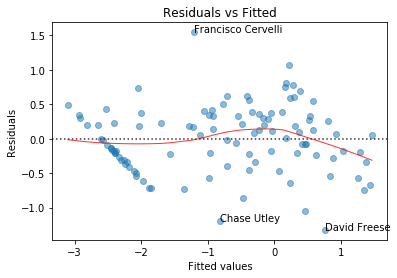

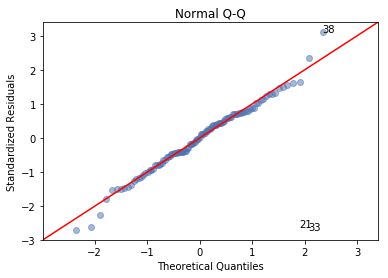

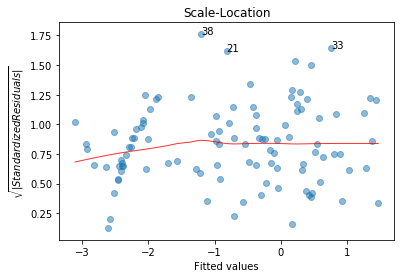

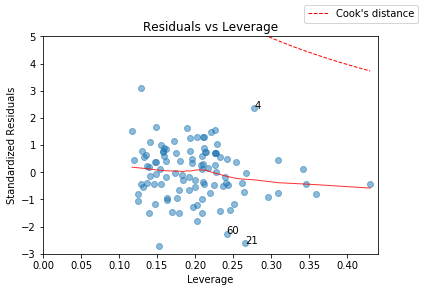

In [880]:
diagnostic_plots.diagnostic_plots(batters_only_df.drop(
    'log_salary', axis=1), batters_only_df['log_salary'], fit12)

In [883]:
y, X = patsy.dmatrices('log_salary ~ Hits + RBI + OPS + SB + Age + Total_games_played +'
                       'First_Base + Second_Base + Shortstop + Left_Field + Right_Field +'
                       'LAA + PIT + WSN',
                       data=batters_only_df, return_type="dataframe")

model13 = sm.OLS(y, X)

fit13 = model13.fit()

fit13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_salary   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     43.09
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           1.01e-33
Time:                        20:06:44   Log-Likelihood:                -72.482
No. Observations:                 105   AIC:                             175.0
Df Residuals:                      90   BIC:                             214.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.0499      0.781     -1.345      0.182      -2.601       0.501
Hits                   0.0099      0.005      2.110      0.038       0.001       0.019
RBI                   -0.0125      0.007     -1.826      0.071      -0.026       0.001
OPS                    1.2703      0.687      1.850      0.068      -0.094       2.634
SB                    -0.0299      0.011     -2.836      0.006      -0.051      -0.009
Age                   -0.1048      0.025     -4.141      0.000      -0.155      -0.055
Total_games_played     0.0043      0.000      9.636      0.000       0.003       0.005
First_Base            -0.4813      0.173     -2.787      0.006      -0.824      -0.138
Second_Base           -0.5074      0.171     -2.975      0.004      -0.846      -0.169
Shortstop             -0.4977      0.185     -2.685      0.009      -0.866      -0.129
Left_Field            -0.2996      0.189     -1.584      0.117      -0.675       0.076
Right_Field           -0.4034      0.192     -2.103      0.038      -0.784      -0.022
LAA                    0.1523      0.185      0.824      0.412      -0.215       0.519
PIT                    0.1543      0.172      0.897      0.372      -0.188       0.496
WSN                    0.2135      0.181      1.181      0.241      -0.146       0.573
==============================================================================
Omnibus:                        1.312   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.519   Jarque-Bera (JB):                0.814
Skew:                          -0.048   Prob(JB):                        0.665
Kurtosis:                       3.421   Cond. No.                     1.15e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""